# Importing Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

# import k-means from clustering stage                                                                                                                                                                                                                                                                                                                                                                                       
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
# housing price data
price_data = pd.read_csv("housing_price_mumbai_ready.csv", index_col = [0])

In [3]:
price_data.shape

(785, 19)

In [4]:
price_data.head(10)

,sub_city,place,price_range,q/q,1BHK,2BHK,3BHK,price_lower_limit,price_upper_limit,1BHK_rental_lower_limit,1BHK_rental_higher_limit,2BHK_rental_lower_limit,2BHK_rental_higher_limit,3BHK_rental_lower_limit,3BHK_rental_higher_limit,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
0,Mumbai Thane,Anand Nagar,"Rs. 7,735 - 8,628/sq. ft.",1.03,"Rs. 10,566 - 12,486","Rs. 15,300 - 18,360","Rs. 19,890 - 24,310",7735,8628,10566,12486,15300,18360,19890,24310,8181.5,11526.0,16830.0,22100.0
1,Mumbai Thane,Ashok Nagar,"Rs. 8,840 - 10,242/sq. ft.",0.00,-,"Rs. 18,553 - 20,973",-,8840,10242,0,0,18553,20973,0,0,9541.0,0.0,19763.0,0.0
2,Mumbai Thane,Balkum,"Rs. 8,755 - 9,988/sq. ft.",2.24,"Rs. 12,928 - 15,415","Rs. 17,850 - 20,825","Rs. 25,517 - 29,345",8755,9988,12928,15415,17850,20825,25517,29345,9371.5,14171.5,19337.5,27431.0
3,Mumbai Thane,Balkum Pada,"Rs. 8,542 - 9,095/sq. ft.",0.48,"Rs. 10,846 - 14,297","Rs. 13,728 - 19,508",-,8542,9095,10846,14297,13728,19508,0,0,8818.5,12571.5,16618.0,0.0
4,Mumbai Thane,Bhaskar Colony,"Rs. 13,940 - 15,555/sq. ft.",0.00,-,-,-,13940,15555,0,0,0,0,0,0,14747.5,0.0,0.0,0.0
5,Mumbai Thane,Bhayandarpada,"Rs. 7,012 - 7,905/sq. ft.",0.00,-,"Rs. 13,600 - 15,300",-,7012,7905,0,0,13600,15300,0,0,7458.5,0.0,14450.0,0.0
6,Mumbai Thane,Brahmand,"Rs. 8,415 - 9,308/sq. ft.",0.00,"Rs. 12,243 - 12,714","Rs. 16,830 - 19,890",-,8415,9308,12243,12714,16830,19890,0,0,8861.5,12478.5,18360.0,0.0
7,Mumbai Thane,Budhaji Nagar,"Rs. 7,268 - 8,202/sq. ft.",3.63,-,-,-,7268,8202,0,0,0,0,0,0,7735.0,0.0,0.0,0.0
8,Mumbai Thane,Charai,"Rs. 10,158 - 12,155/sq. ft.",4.26,"Rs. 13,260 - 14,586",-,-,10158,12155,13260,14586,0,0,0,0,11156.5,13923.0,0.0,0.0
9,Mumbai Thane,Chirak Nagar,"Rs. 10,455 - 11,688/sq. ft.",0.38,"Rs. 17,629 - 20,222","Rs. 20,196 - 22,889",-,10455,11688,17629,20222,20196,22889,0,0,11071.5,18925.5,21542.5,0.0


In [5]:
price_data.columns

Index(['sub_city', 'place', 'price_range', 'q/q', '1BHK', '2BHK', '3BHK',
       'price_lower_limit', 'price_upper_limit', '1BHK_rental_lower_limit',
       '1BHK_rental_higher_limit', '2BHK_rental_lower_limit',
       '2BHK_rental_higher_limit', '3BHK_rental_lower_limit',
       '3BHK_rental_higher_limit', 'Avg_price', 'Avg_1BHK_rental',
       'Avg_2BHK_rental', 'Avg_3BHK_rental'],
      dtype='object')

In [6]:
price_data.drop(["price_range","1BHK", "2BHK", "3BHK", "price_lower_limit", "price_upper_limit", "1BHK_rental_lower_limit", "1BHK_rental_higher_limit", "2BHK_rental_lower_limit", "2BHK_rental_higher_limit", "3BHK_rental_lower_limit", "3BHK_rental_higher_limit"], axis = 1,inplace = True)




In [7]:
price_data.head(10)

,sub_city,place,q/q,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
0,Mumbai Thane,Anand Nagar,1.03,8181.5,11526.0,16830.0,22100.0
1,Mumbai Thane,Ashok Nagar,0.00,9541.0,0.0,19763.0,0.0
2,Mumbai Thane,Balkum,2.24,9371.5,14171.5,19337.5,27431.0
3,Mumbai Thane,Balkum Pada,0.48,8818.5,12571.5,16618.0,0.0
4,Mumbai Thane,Bhaskar Colony,0.00,14747.5,0.0,0.0,0.0
5,Mumbai Thane,Bhayandarpada,0.00,7458.5,0.0,14450.0,0.0
6,Mumbai Thane,Brahmand,0.00,8861.5,12478.5,18360.0,0.0
7,Mumbai Thane,Budhaji Nagar,3.63,7735.0,0.0,0.0,0.0
8,Mumbai Thane,Charai,4.26,11156.5,13923.0,0.0,0.0
9,Mumbai Thane,Chirak Nagar,0.38,11071.5,18925.5,21542.5,0.0


In [8]:
price_data.shape

(785, 7)

In [9]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 784
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sub_city         785 non-null    object 
 1   place            785 non-null    object 
 2   q/q              785 non-null    float64
 3   Avg_price        785 non-null    float64
 4   Avg_1BHK_rental  785 non-null    float64
 5   Avg_2BHK_rental  785 non-null    float64
 6   Avg_3BHK_rental  785 non-null    float64
dtypes: float64(5), object(2)
memory usage: 49.1+ KB


In [10]:
price_data.describe()

,q/q,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
count,785.000000,785.000000,785.000000,785.000000,785.000000
mean,2.380599,12595.222293,11260.276433,19426.770064,21191.042675
std,2.666942,8703.996576,12162.901319,22929.078301,39889.193873
min,0.000000,2337.500000,0.000000,0.000000,0.000000
25%,0.000000,6736.500000,0.000000,0.000000,0.000000
50%,1.600000,10391.000000,8898.500000,15100.000000,0.000000
75%,3.560000,15725.000000,17531.500000,28538.500000,32640.000000
max,15.900000,63261.500000,81515.000000,138736.500000,242801.000000


In [11]:
price_data.describe(include = "object")

,sub_city,place
count,785,785
unique,9,774
top,Mumbai Navi,Hanuman Nagar
freq,251,3


In [12]:
# Number of bins for Histogram
bins = int(np.sqrt(price_data.shape[0]))
bins

28

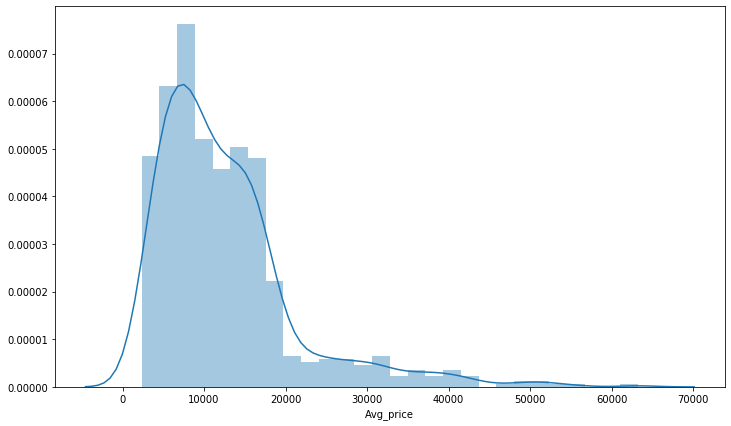

In [13]:
plt.figure(figsize = (12,7))
sns.distplot(price_data.Avg_price,bins=bins)
plt.show()

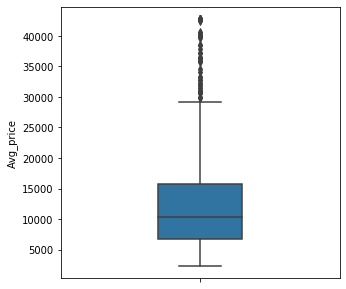

In [235]:
plt.figure(figsize=(5,5))
sns.boxplot(y = price_data.Avg_price,width = 0.3)

We can see there are many outliers. We will treat them in the next section

In [15]:
price_data.head()

,sub_city,place,q/q,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
0,Mumbai Thane,Anand Nagar,1.03,8181.5,11526.0,16830.0,22100.0
1,Mumbai Thane,Ashok Nagar,0.00,9541.0,0.0,19763.0,0.0
2,Mumbai Thane,Balkum,2.24,9371.5,14171.5,19337.5,27431.0
3,Mumbai Thane,Balkum Pada,0.48,8818.5,12571.5,16618.0,0.0
4,Mumbai Thane,Bhaskar Colony,0.00,14747.5,0.0,0.0,0.0


# Treating Outliers

In [16]:
##
IQR = price_data.Avg_price.quantile(0.75) - price_data.Avg_price.quantile(0.25)
upper_limit = price_data.Avg_price.quantile(0.75) + (IQR * 3)
lower_limit = price_data.Avg_price.quantile(0.25) - (IQR * 1.5)
outlier_df = price_data[(price_data["Avg_price"] > upper_limit) | (price_data["Avg_price"] < lower_limit)]
print(outlier_df.shape)
outlier_df.sort_values(by = "Avg_price")

(11, 7)


,sub_city,place,q/q,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
731,Mumbai South,Haji Ali,0.00,42776.5,0.0,106970.0,0.0
745,Mumbai South,Marine Drive,0.00,43031.0,0.0,117300.0,192100.0
754,Mumbai South,Peddar Road,0.57,43308.0,64387.0,107248.5,186997.0
736,Mumbai South,Kemps Corner,0.00,47047.5,52108.5,65295.5,0.0
724,Mumbai South,Cuffe Parade,1.79,48407.0,75968.5,125191.0,187739.5
759,Mumbai South,Walkeshwar,5.04,49746.0,0.0,0.0,0.0
751,Mumbai South,Napean Sea Road,2.25,51298.0,63813.5,98930.0,242801.0
721,Mumbai South,Chamundeshwari Nagar,2.72,51489.0,79322.5,134674.0,194960.0
743,Mumbai South,Malabar Hill,1.38,52466.5,67128.5,120625.0,224239.0
719,Mumbai South,Breach Candy,1.40,55292.0,69462.0,134732.0,209950.0


These outliers are not errors caused during data collection or anything else, but actual values as we know housing prices downtown are exhorbitantly high. But we can't keep these outliers like this. So we'll treat them by a method called "creating caps". We'll change all outliers average price to the lowest outlier average price.

In [17]:
outlier_df["Avg_price"].min()

42776.5

In [18]:
# ##
# price_data_copy = price_data.copy()

# cap = 42776.5
# price_data_copy.loc[price_data_copy["Avg_price"] >= cap,"Avg_price"] = cap

# plt.figure(figsize = (12,7))
# sns.distplot(price_data_copy.Avg_price,bins=bins)
# plt.show()

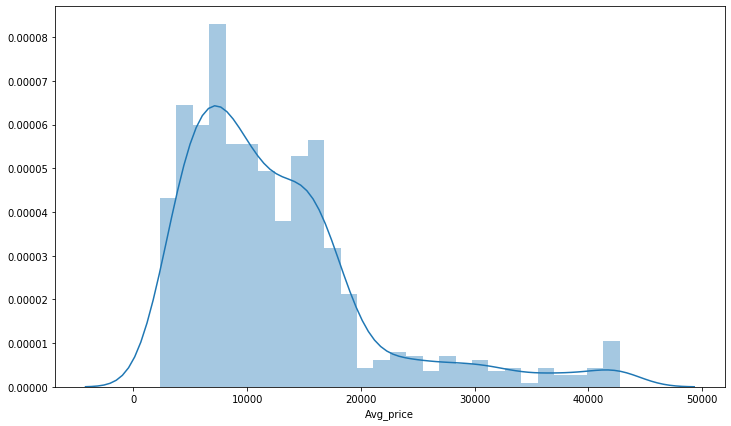

In [19]:
##

cap = outlier_df["Avg_price"].min()
price_data.loc[price_data["Avg_price"] >= cap,"Avg_price"] = cap

plt.figure(figsize = (12,7))
sns.distplot(price_data.Avg_price,bins=bins)
plt.show()

In [20]:
# price_data[price_data["Avg_price"] > upper_limit]

In [21]:
# ##
# from scipy import stats
# z = stats.zscore(price_data["Avg_price"])
# price_data.loc[np.where(z > 3)].shape

In [22]:
print('The dataframe has {} subcity and {} neighborhoods.'.format(
        len(price_data['sub_city'].unique()),
        price_data.shape[0]
    )
)

The dataframe has 9 subcity and 785 neighborhoods.


## Group data wrt sub_city

In [23]:
subcity_avgprice = price_data[["sub_city","q/q", "Avg_price", "Avg_1BHK_rental", "Avg_2BHK_rental", "Avg_3BHK_rental"]].groupby("sub_city").mean().sort_values(by = "Avg_price", ascending = False)
subcity_avgprice




,q/q,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
sub_city,,,,,
Mumbai South,2.566923,32385.846154,29353.000000,62986.875000,102453.846154
Mumbai South West,2.631053,28182.026316,27389.131579,45460.342105,87113.605263
Mumbai Harbour,2.940625,18581.843750,24168.062500,39762.593750,34704.406250
Mumbai Andheri-Dahisar,2.272662,16872.510791,13934.215827,24208.068345,23647.021583
Central Mumbai suburbs,2.650781,15095.148438,16985.031250,23060.164062,20398.031250
Mumbai Thane,1.749324,9949.000000,9237.344595,13917.270270,11750.229730
Mumbai Navi,2.534701,9271.175299,8255.344622,15907.378486,13792.318725
Mira Road And Beyond,1.955588,6616.264706,5540.448529,5910.536765,1697.448529
Mumbai Beyond Thane,2.490784,4590.887255,2446.813725,2053.240196,565.823529


Mumbai South usually have costly house prices which can be seen from the outliers table, which contains neighborhood in south region. Whereas as we go away from main land of Mumbai Prices go down.

In [24]:
price_data.rename(columns={"place":"neighborhood"},inplace = True)
price_data.head()

,sub_city,neighborhood,q/q,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
0,Mumbai Thane,Anand Nagar,1.03,8181.5,11526.0,16830.0,22100.0
1,Mumbai Thane,Ashok Nagar,0.00,9541.0,0.0,19763.0,0.0
2,Mumbai Thane,Balkum,2.24,9371.5,14171.5,19337.5,27431.0
3,Mumbai Thane,Balkum Pada,0.48,8818.5,12571.5,16618.0,0.0
4,Mumbai Thane,Bhaskar Colony,0.00,14747.5,0.0,0.0,0.0


In [25]:
price_data["neighborhood"].value_counts(ascending = False).head(20)

Hanuman Nagar        3
Vaishali Nagar       2
Subhash Nagar        2
Ganesh Nagar         2
Sai Nagar            2
Asha Nagar           2
Shanti Nagar         2
Gandhi Nagar         2
Maharashtra Nagar    2
Shastri Nagar        2
Aarey Milk Colony    1
Sriprastha           1
Sector-3 Belpada     1
Sector-31 Kamothe    1
Bander Pakhadi       1
Sector 17 Vashi      1
Harigram             1
Bolinj               1
Pendse Nagar         1
Virar East           1
Name: neighborhood, dtype: int64

In [26]:
price_data[price_data["neighborhood"] == "Hanuman Nagar"]

,sub_city,neighborhood,q/q,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
107,Mumbai Beyond Thane,Hanuman Nagar,0.00,4462.5,0.0,0.0,0.0
289,Mumbai Andheri-Dahisar,Hanuman Nagar,0.00,13558.0,0.0,0.0,0.0
732,Mumbai South,Hanuman Nagar,2.41,27115.0,25627.5,0.0,211475.0


In [27]:
# cordinates_df[cordinates_df["name"] == "Hanuman Nagar"]

In [28]:
# cordinates data
cordinates_df = pd.read_csv("Place_Cordinates.csv", index_col = [0])

In [29]:
cordinates_df.head()

,name,latitude,longitude
0,4 Bunglows,19.1247,72.8264
1,Aarey Milk Colony,19.1510,72.8831
2,Abhyudaya Nagar,18.9914,72.8442
3,Adaigaon,19.0086,73.1282
4,Adharwadi,19.2570,73.1240


In [30]:
cordinates_df.shape

(894, 3)

In [31]:
cordinates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 901
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       894 non-null    object 
 1   latitude   894 non-null    float64
 2   longitude  894 non-null    float64
dtypes: float64(2), object(1)
memory usage: 27.9+ KB


In [32]:
cordinates_df.describe()

,latitude,longitude
count,894.000000,894.000000
mean,19.131081,72.959759
std,0.118919,0.118847
min,18.538000,72.728655
25%,19.041900,72.852600
50%,19.125250,72.954700
75%,19.201200,73.033625
max,20.003254,73.334600


In [33]:
cordinates_df.describe(include= 'object')

,name
count,894
unique,894
top,Harigram
freq,1


In [34]:
neighborhood_cordinates = cordinates_df.merge(price_data[["sub_city","neighborhood"]], left_on="name",right_on="neighborhood").drop("neighborhood",axis = 1)
neighborhood_cordinates = neighborhood_cordinates[["sub_city"] + (cordinates_df.columns).to_list()]
neighborhood_cordinates.rename(columns={"name":"neighborhood"},inplace= True)
neighborhood_cordinates.sample(20)

,sub_city,neighborhood,latitude,longitude
170,Mumbai Andheri-Dahisar,Kandivali (West),19.199800,72.842600
550,Mumbai Andheri-Dahisar,Bangur Nagar,19.165500,72.832300
186,Mumbai Navi,Khalapur,18.830600,73.284600
223,Mumbai Andheri-Dahisar,Malad (East),19.185400,72.858500
60,Mumbai Thane,Charai,19.198500,72.974800
17,Mumbai Thane,Anand Nagar,19.255700,72.865600
77,Mumbai Andheri-Dahisar,Dahanukar Wadi,19.208500,72.837500
206,Mumbai Navi,Kutak Bandhan,19.072900,73.075200
344,Mumbai Navi,Sector 19 Kharghar,19.050100,73.078200
776,Mumbai Andheri-Dahisar,Yamuna Nagar,19.148800,72.826800


In [35]:
neighborhood_cordinates.shape

(777, 4)

In [36]:
neighborhood_cordinates.neighborhood.value_counts(ascending = False).head(11)

Hanuman Nagar        3
Shastri Nagar        2
Vaishali Nagar       2
Ganesh Nagar         2
Sai Nagar            2
Maharashtra Nagar    2
Subhash Nagar        2
Asha Nagar           2
Shanti Nagar         2
Gandhi Nagar         2
Sector 2 Ulwe        1
Name: neighborhood, dtype: int64

These are the places that appear more than once in the data. As we joined on this and got the subcity.

In [37]:
neighborhood_cordinates.neighborhood.value_counts(ascending = False)[neighborhood_cordinates.neighborhood.value_counts(ascending = False).values > 1]

Hanuman Nagar        3
Shastri Nagar        2
Vaishali Nagar       2
Ganesh Nagar         2
Sai Nagar            2
Maharashtra Nagar    2
Subhash Nagar        2
Asha Nagar           2
Shanti Nagar         2
Gandhi Nagar         2
Name: neighborhood, dtype: int64

In [38]:
double_name = neighborhood_cordinates.neighborhood.value_counts(ascending = False)[neighborhood_cordinates.neighborhood.value_counts(ascending = False).values > 1].index.tolist()
double_name

['Hanuman Nagar',
 'Shastri Nagar',
 'Vaishali Nagar',
 'Ganesh Nagar',
 'Sai Nagar',
 'Maharashtra Nagar',
 'Subhash Nagar',
 'Asha Nagar',
 'Shanti Nagar',
 'Gandhi Nagar']

In [39]:
double_df = pd.DataFrame()
for name in double_name:

    double_df = double_df.append(neighborhood_cordinates[neighborhood_cordinates["neighborhood"] == name ])

double_df

,sub_city,neighborhood,latitude,longitude
128,Mumbai Beyond Thane,Hanuman Nagar,19.1954,72.8671
129,Mumbai Andheri-Dahisar,Hanuman Nagar,19.1954,72.8671
130,Mumbai South,Hanuman Nagar,19.1954,72.8671
462,Mumbai Beyond Thane,Shastri Nagar,19.1394,72.8294
463,Mumbai Andheri-Dahisar,Shastri Nagar,19.1394,72.8294
496,Mumbai Andheri-Dahisar,Vaishali Nagar,19.1441,72.8445
497,Central Mumbai suburbs,Vaishali Nagar,19.1441,72.8445
108,Mumbai Beyond Thane,Ganesh Nagar,19.1327,72.8796
109,Central Mumbai suburbs,Ganesh Nagar,19.1327,72.8796
309,Mumbai Thane,Sai Nagar,18.9955,73.1010


This dataframe contains neighborhood names which appear in more than one subcities are not duplicates. So we'll have to correct their cordinates.

In [40]:
neighborhood_cordinates.head()

,sub_city,neighborhood,latitude,longitude
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282
4,Mumbai Thane,Adharwadi,19.2570,73.1240


In [41]:
extra_place = {"Hanuman Nagar":{"Mumbai Beyond Thane":[19.2011,72.9470],"Mumbai South":[19.0102,72.8227]},"Shanti Nagar":{"Mira Road And Beyond":[19.2805,72.8619]},"Gandhi Nagar":{"Mumbai Beyond Thane":[19.2194,72.9708]},"Subhash Nagar":{"Mumbai Andheri-Dahisar":[19.1136,72.8697]},"Sai Nagar":{"Mumbai Thane":[19.2650,72.9630]},"Shastri Nagar":{"Mumbai Beyond Thane":[19.2134,72.9576]},"Vaishali Nagar":{"Central Mumbai suburbs":[18.9810,72.8253]},"Ganesh Nagar":{"Mumbai Beyond Thane":[19.1819,73.0575]},"Maharashtra Nagar":{"Mumbai Beyond Thane":[19.2266,72.9702]}}

In [42]:
# "Hanuman Nagar":{"Mumbai South":[19.0102,19.0102]}

In [43]:
# ## test code
# for n in extra_place:
#     for l in extra_place[n].keys():
#         # print(l)
#         x = extra_place[n][l]
#         print(x[0])
# # extra_place["Sai Nagar"].keys()# == "Mumbai Thane"

In [44]:
for p in extra_place:
    for k in extra_place[p].keys():
        x = extra_place[p][k]
        neighborhood_cordinates.loc[(neighborhood_cordinates["neighborhood"] == p) & (neighborhood_cordinates["sub_city"] == k),"latitude"] = x[0]
        neighborhood_cordinates.loc[(neighborhood_cordinates["neighborhood"] == p) & (neighborhood_cordinates["sub_city"] == k),"longitude"] = x[1]

In [45]:
double_df_1 = pd.DataFrame()
for name in double_name:

    double_df_1 = double_df_1.append(neighborhood_cordinates[neighborhood_cordinates["neighborhood"] == name ])

double_df_1

,sub_city,neighborhood,latitude,longitude
128,Mumbai Beyond Thane,Hanuman Nagar,19.2011,72.9470
129,Mumbai Andheri-Dahisar,Hanuman Nagar,19.1954,72.8671
130,Mumbai South,Hanuman Nagar,19.0102,72.8227
462,Mumbai Beyond Thane,Shastri Nagar,19.2134,72.9576
463,Mumbai Andheri-Dahisar,Shastri Nagar,19.1394,72.8294
496,Mumbai Andheri-Dahisar,Vaishali Nagar,19.1441,72.8445
497,Central Mumbai suburbs,Vaishali Nagar,18.9810,72.8253
108,Mumbai Beyond Thane,Ganesh Nagar,19.1819,73.0575
109,Central Mumbai suburbs,Ganesh Nagar,19.1327,72.8796
309,Mumbai Thane,Sai Nagar,19.2650,72.9630


Now we can observe that every neighborhood has its distinct cordiantes.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent mumbai_explorer, as shown below.

In [46]:
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="mumbai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai City are 18.9387711, 72.8353355.


In [47]:
# 19.0760° N, 72.8777° E

## Create a map of Mumbai with neighborhoods superimposed on top.

In [48]:
price_data.columns

Index(['sub_city', 'neighborhood', 'q/q', 'Avg_price', 'Avg_1BHK_rental',
       'Avg_2BHK_rental', 'Avg_3BHK_rental'],
      dtype='object')

In [49]:
neighborhood_cordinates.columns

Index(['sub_city', 'neighborhood', 'latitude', 'longitude'], dtype='object')

In [50]:
# create map of Mumbai using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, subcity, neighborhood in zip(neighborhood_cordinates['latitude'], neighborhood_cordinates['longitude'], neighborhood_cordinates['sub_city'], neighborhood_cordinates['neighborhood']):
    label = '{}, {}'.format(neighborhood, subcity)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color= '#3186cd',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
    
# map_mumbai
# map_mumbai.save(outfile= "Map_Neighborhood_of_Mumbai.html")
### find Map in Week 5/ Maps_Html

In [51]:
# neighborhood_cordinates[neighborhood_cordinates["neighborhood"] == "Shanti Nagar"]

# Map by Average Price

In [52]:
neighborhood_cordinates.head()

,sub_city,neighborhood,latitude,longitude
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282
4,Mumbai Thane,Adharwadi,19.2570,73.1240


In [53]:
price_data.head()

,sub_city,neighborhood,q/q,Avg_price,Avg_1BHK_rental,Avg_2BHK_rental,Avg_3BHK_rental
0,Mumbai Thane,Anand Nagar,1.03,8181.5,11526.0,16830.0,22100.0
1,Mumbai Thane,Ashok Nagar,0.00,9541.0,0.0,19763.0,0.0
2,Mumbai Thane,Balkum,2.24,9371.5,14171.5,19337.5,27431.0
3,Mumbai Thane,Balkum Pada,0.48,8818.5,12571.5,16618.0,0.0
4,Mumbai Thane,Bhaskar Colony,0.00,14747.5,0.0,0.0,0.0


In [54]:
avg_price_plot = neighborhood_cordinates.merge(price_data[["Avg_price","neighborhood","sub_city"]],on = ["neighborhood","sub_city"])
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0
4,Mumbai Thane,Adharwadi,19.2570,73.1240,5291.0


In [55]:
avg_price_plot.shape

(777, 5)

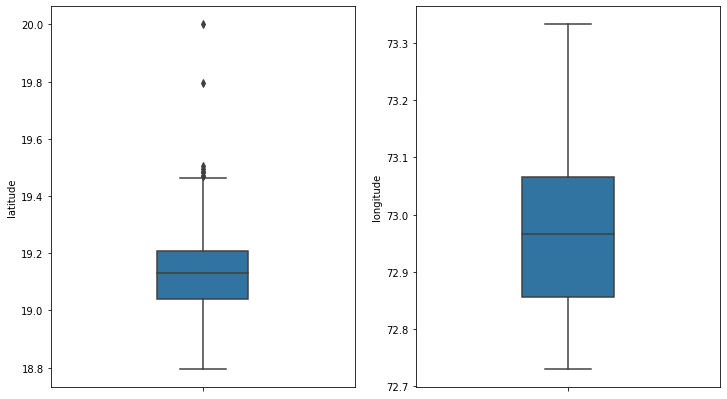

In [56]:
# EDA
fig, ax = plt.subplots(1,2,figsize=(12,7))
sns.boxplot(y = avg_price_plot.latitude,width = 0.3, ax=ax[0])
sns.boxplot(y = avg_price_plot.longitude,width = 0.3, ax= ax[1])
# sns.scatterplot(x = "latitude", y = "longitude", data = avg_price_plot)

In [57]:
## Outlier for Latitude
IQR = avg_price_plot.latitude.quantile(0.75) - avg_price_plot.latitude.quantile(0.25)
upper_limit = avg_price_plot.latitude.quantile(0.75) + (IQR * 3)
lower_limit = avg_price_plot.latitude.quantile(0.25) - (IQR * 1.5)
print(avg_price_plot[(avg_price_plot["latitude"] > upper_limit) | (avg_price_plot["latitude"] < lower_limit)].shape)
avg_price_plot[(avg_price_plot["latitude"] > upper_limit) | (avg_price_plot["latitude"] < lower_limit)]

(2, 5)


,sub_city,neighborhood,latitude,longitude,Avg_price
45,Mira Road And Beyond,Boisar,19.796900,72.745200,3187.5
758,Mumbai Beyond Thane,Thakurwadi,20.003254,72.728655,5823.0


In [58]:
## Outlier for Longitude
IQR = avg_price_plot.longitude.quantile(0.75) - avg_price_plot.longitude.quantile(0.25)
upper_limit = avg_price_plot.longitude.quantile(0.75) + (IQR * 3)
lower_limit = avg_price_plot.longitude.quantile(0.25) - (IQR * 1.5)
print(avg_price_plot[(avg_price_plot["longitude"] > upper_limit) | (avg_price_plot["longitude"] < lower_limit)].shape)
avg_price_plot[(avg_price_plot["longitude"] > upper_limit) | (avg_price_plot["longitude"] < lower_limit)]

(0, 5)


,sub_city,neighborhood,latitude,longitude,Avg_price


We can see from the diagram as well as from data there are no outliers in longitude, but surely there's 2 in latitude. And after checking on the map we can conclude that they are real outliers and can be discarded.

In [59]:
avg_price_plot.drop([45,758], axis = 0, inplace = True)

In [60]:
##
IQR = avg_price_plot.latitude.quantile(0.75) - avg_price_plot.latitude.quantile(0.25)
upper_limit = avg_price_plot.latitude.quantile(0.75) + (IQR * 3)
lower_limit = avg_price_plot.latitude.quantile(0.25) - (IQR * 1.5)
print(avg_price_plot[(avg_price_plot["latitude"] > upper_limit) | (avg_price_plot["latitude"] < lower_limit)].shape)
avg_price_plot[(avg_price_plot["latitude"] > upper_limit) | (avg_price_plot["latitude"] < lower_limit)]

(0, 5)


,sub_city,neighborhood,latitude,longitude,Avg_price


In [61]:
avg_price_plot.drop_duplicates(subset=["sub_city","neighborhood"]).shape

(775, 5)

The shape is same as above hence we dont have duplicates

In [62]:
avg_price_plot.drop_duplicates(subset=["Avg_price","neighborhood"]).shape  #[avg_price_plot["neighborhood"] == "Hanuman Nagar"]    #["neighborhood"].value_counts(ascending = False).head()

(775, 5)

the same shape Hence fully confirmed there are no duplicates

In [63]:
subcity_house_count = avg_price_plot.groupby("sub_city").count()["neighborhood"].sort_values(ascending = False).reset_index()
subcity_house_count

,sub_city,neighborhood
0,Mumbai Navi,250
1,Mumbai Andheri-Dahisar,137
2,Mumbai Beyond Thane,97
3,Mumbai Thane,73
4,Mira Road And Beyond,67
5,Central Mumbai suburbs,64
6,Mumbai South,52
7,Mumbai South West,19
8,Mumbai Harbour,16


Navi Mumbai has the highest number of housing data followed by Andheri-Dahisar, whereas South Mumbai and Harbour has the lowest housing data

### Adding Price Label

In [64]:
avg_price_plot['price_label']=avg_price_plot["neighborhood"]+" -Rs."+avg_price_plot["Avg_price"].astype(str)+"/sq.ft"
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft
4,Mumbai Thane,Adharwadi,19.2570,73.1240,5291.0,Adharwadi -Rs.5291.0/sq.ft


In [65]:
avg_price_hm = avg_price_plot[["latitude", "longitude", "Avg_price"]].groupby(["latitude","longitude"], as_index = False).mean()
avg_price_hm.head()

,latitude,longitude,Avg_price
0,18.793900,73.334600,3421.0
1,18.830600,73.284600,7820.0
2,18.877235,72.928337,3506.5
3,18.881200,72.964500,4568.5
4,18.893100,73.170100,3294.0


In [66]:
from folium.plugins import HeatMap

max_amount = float(avg_price_hm['Avg_price'].max())

hmap = folium.Map(location=[latitude, longitude], zoom_start=11,)

hm_wide = HeatMap( list(zip(avg_price_hm.latitude, avg_price_hm.longitude, avg_price_hm['Avg_price'])),
                   min_opacity=0.5,
                   max_val=max_amount,
                   radius=10, 
                   blur=10,
                   max_zoom=5, 
                 )

hmap.add_child(hm_wide)
for lat, lng, label in zip(avg_price_plot.latitude, avg_price_plot.longitude, avg_price_plot['price_label']):
    folium.CircleMarker(
        [lat, lng],
        radius=0.2,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.01
        ).add_to(hmap)
# hmap.save(outfile= "Map_Avg_Price_Heat_Map.html")
# hmap
### find Map in Week 5/ Maps_Html

![Regions](High_Avg_Price_Heat_Map.PNG)

**CONCLUSION FROM ABOVE MAP:** We can see that the heat map shows high Average Price of house mainly in three regions as marked in the image. Out of these the region in South Mumbai has very low number of houses as compared to Navi Mumbai and Suburbs in the the data hence that concludes that the houses in this region are much costlier than anywhere in Mumbai.

# Cluster Map by SubCity

In [67]:
avg_price_plot.head(10)

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft
4,Mumbai Thane,Adharwadi,19.2570,73.1240,5291.0,Adharwadi -Rs.5291.0/sq.ft
5,Mumbai Beyond Thane,Agashi,19.4604,72.7747,4292.0,Agashi -Rs.4292.0/sq.ft
6,Central Mumbai suburbs,Airoli,19.1590,72.9986,10753.0,Airoli -Rs.10753.0/sq.ft
7,Mumbai Andheri-Dahisar,Akurli Nagar,19.1997,72.8589,18445.0,Akurli Nagar -Rs.18445.0/sq.ft
8,Mumbai Andheri-Dahisar,Alika Nagar,19.1980,72.8707,15194.0,Alika Nagar -Rs.15194.0/sq.ft
9,Mumbai Beyond Thane,Ambawadi,19.2411,72.8600,4314.0,Ambawadi -Rs.4314.0/sq.ft


In [68]:
subcity_unique = avg_price_plot.sub_city.unique().tolist()

In [69]:
no_subcity = len(avg_price_plot.sub_city.unique())

In [70]:
subcity_unique.index("Mumbai Andheri-Dahisar")

5

In [71]:
# create map
map_subcity = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(no_subcity)
ys = [i + x + (i*x)**2 for i in range(no_subcity)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbor, subcity in zip(avg_price_plot['latitude'], avg_price_plot['longitude'], avg_price_plot['neighborhood'], avg_price_plot["sub_city"]):
    label = folium.Popup(str(neighbor) + ' Cluster ' + str(subcity), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[subcity_unique.index(subcity)-1],
        fill=True,
        fill_color=rainbow[subcity_unique.index(subcity)-1],
        fill_opacity=0.7).add_to(map_subcity)
# map_subcity.save(outfile= "Map_Cluster_By_SubCity.html")     
# map_subcity
### find Map in Week 5/ Maps_Html

# Map of binned price

In [72]:
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft
4,Mumbai Thane,Adharwadi,19.2570,73.1240,5291.0,Adharwadi -Rs.5291.0/sq.ft


In [73]:
# avg_price_plot["Avg_price"].values.cut(10)

In [74]:
bins= np.linspace(min(avg_price_plot["Avg_price"]),max(avg_price_plot["Avg_price"]),11)
group_names=range(1,11)
avg_price_plot['price_binned']=pd.cut(avg_price_plot['Avg_price'],bins,labels=group_names,include_lowest=True)

In [75]:
avg_price_plot.sort_values('price_binned',inplace=True)
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label,price_binned
159,Mumbai Navi,Kalamboli,19.0328,73.1012,6609.0,Kalamboli -Rs.6609.0/sq.ft,1
505,Mira Road And Beyond,Vasant Nagari,19.4039,72.8294,5100.0,Vasant Nagari -Rs.5100.0/sq.ft,1
504,Mira Road And Beyond,Vasai West,19.3665,72.8155,6120.0,Vasai West -Rs.6120.0/sq.ft,1
503,Mira Road And Beyond,Vasai East,19.4056,72.8557,5121.5,Vasai East -Rs.5121.5/sq.ft,1
748,Mumbai Beyond Thane,Sonivali,19.1763,73.2581,3633.5,Sonivali -Rs.3633.5/sq.ft,1


In [76]:
binned_avg_price = avg_price_plot.groupby("price_binned")["Avg_price"].mean()
binned_avg_price

price_binned
1      4779.519022
2      8451.748792
3     12692.678082
4     16472.802920
5     20533.913043
6     24570.631579
7     28701.694444
8     32386.653846
9     36989.850000
10    41886.194444
Name: Avg_price, dtype: float64

In [77]:
avg_price_plot.price_binned.unique()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [78]:
map_price_grouped = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(11)
ys = [i + x + (i*x)**2 for i in range(11)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, labl, price_bin in zip(avg_price_plot['latitude'], avg_price_plot['longitude'], avg_price_plot['price_label'],avg_price_plot['price_binned']):
    label = folium.Popup(str(labl), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        blur=5,
        popup=label,
        color=rainbow[price_bin-1],
        fill=True,
        fill_color=rainbow[price_bin-1],
        fill_opacity=1).add_to(map_price_grouped)

# map_price_grouped.save(outfile="Map_Price_Cluster.html")
# map_price_grouped
### find Map in Week 5/ Maps_Html

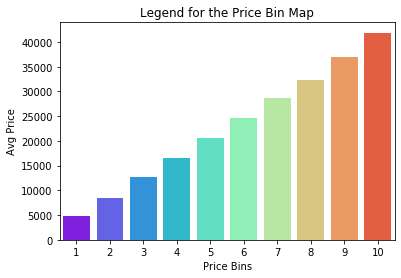

In [79]:
# Legend for above Map
fig, ax = plt.subplots()
bar = sns.barplot(x = binned_avg_price.index,y = binned_avg_price,palette = rainbow, ax= ax)
ax.set_xlabel("Price Bins")
ax.set_ylabel("Avg Price")
ax.set_title("Legend for the Price Bin Map")
# ax.legend(handles = bar)
plt.savefig('Legend_Price_Cluster.jpg')

**Prices increases as we go South. Towards Town**

**CONCLUSION FROM ABOVE MAP:** This map verify's our above conclusion of housing prices in South Mumbai as compared to other parts of Mumbai. Furthermore we can get that as introduced in the *Project Report* Introduction, the region of Navi Mumbai has been planned for housing only with no factories and industries in the city hence we can see high volume of housing data in the database which are cheap, which again supports the major cause of developing the project of building houses for mid-level professional, technical, or managerial staff working in the main city.

In [80]:
avg_price_plot = avg_price_plot.sort_values(by = "neighborhood").reset_index(drop = True)

In [81]:
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label,price_binned
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft,6
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft,2
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft,6
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft,1
4,Mumbai South,Adarsh Nagar,19.0147,72.8216,36252.0,Adarsh Nagar -Rs.36252.0/sq.ft,9


In [82]:
avg_price_plot[avg_price_plot["neighborhood"] == "Altamount Road"]

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label,price_binned
12,Mumbai Navi,Altamount Road,19.07609,72.877426,42776.5,Altamount Road -Rs.42776.5/sq.ft,10


In [83]:
avg_price_plot[avg_price_plot["price_binned"] == 10]

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label,price_binned
12,Mumbai Navi,Altamount Road,19.076090,72.877426,42776.5,Altamount Road -Rs.42776.5/sq.ft,10
71,Mumbai South,Breach Candy,18.974600,72.806500,42776.5,Breach Candy -Rs.42776.5/sq.ft,10
79,Mumbai South,Chamundeshwari Nagar,18.916300,72.819600,42776.5,Chamundeshwari Nagar -Rs.42776.5/sq.ft,10
96,Mumbai South,Churchgate,18.932200,72.826400,40013.5,Churchgate -Rs.40013.5/sq.ft,10
99,Mumbai South,Cuffe Parade,18.912700,72.821300,42776.5,Cuffe Parade -Rs.42776.5/sq.ft,10
140,Mumbai South,Gamdevi,18.958900,72.812400,39695.0,Gamdevi -Rs.39695.0/sq.ft,10
172,Mumbai South,Gowalia Tank,18.962300,72.810100,40417.0,Gowalia Tank -Rs.40417.0/sq.ft,10
175,Mumbai South,Haji Ali,18.977800,72.810500,42776.5,Haji Ali -Rs.42776.5/sq.ft,10
199,Mumbai South,Jacob Circle,18.982100,72.830100,40013.5,Jacob Circle -Rs.40013.5/sq.ft,10
251,Mumbai South,Kemps Corner,18.962900,72.805400,42776.5,Kemps Corner -Rs.42776.5/sq.ft,10


In [84]:
avg_price_plot.shape

(775, 7)

In [85]:
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label,price_binned
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft,6
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft,2
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft,6
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft,1
4,Mumbai South,Adarsh Nagar,19.0147,72.8216,36252.0,Adarsh Nagar -Rs.36252.0/sq.ft,9


# FourSquare API

We will use Foursquare API to get the venue data for those neighbourhoods. 

In [86]:
CLIENT_ID = 'UXKBZBZXR2THG3RQZZ11HQSWWAML1MSPI0LSCBVJL55EIMCJ' # your Foursquare ID
CLIENT_SECRET = 'LPJQO1MLDZ02EKOVSXQ0JI4MHEGTZ2E1UCIQOINRDGY5EYE0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 1000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UXKBZBZXR2THG3RQZZ11HQSWWAML1MSPI0LSCBVJL55EIMCJ
CLIENT_SECRET:LPJQO1MLDZ02EKOVSXQ0JI4MHEGTZ2E1UCIQOINRDGY5EYE0


In [87]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip( names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [88]:
# def getNearbyVenues(subcities,names, latitudes, longitudes, radius=500):
    
#     venues_list=[]
#     for subcity, name, lat, lng in zip(subcities, names, latitudes, longitudes):
#         print(name)
            
#         # create the API request URL
#         url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#             CLIENT_ID, 
#             CLIENT_SECRET, 
#             VERSION, 
#             lat, 
#             lng, 
#             radius, 
#             LIMIT)
            
#         # make the GET request
#         results = requests.get(url).json()["response"]['groups'][0]['items']
        
#         # return only relevant information for each nearby venue
#         venues_list.append([(
#             subcity,
#             name, 
#             lat, 
#             lng, 
#             v['venue']['name'], 
#             v['venue']['location']['lat'], 
#             v['venue']['location']['lng'],  
#             v['venue']['categories'][0]['name']) for v in results])

#     nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
#     nearby_venues.columns = ['SubCity'
#                   'Neighborhood', 
#                   'Neighborhood Latitude', 
#                   'Neighborhood Longitude', 
#                   'Venue', 
#                   'Venue Latitude', 
#                   'Venue Longitude', 
#                   'Venue Category']
#     Nearby = pd.DataFrame(columns = nearby_venues.columns)
#     Nearby = Nearby.append(nearby_venues)
    
#     return(Nearby)

Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.

In [233]:
# type your answer here

mumbai_venues = getNearbyVenues(names=avg_price_plot['neighborhood'],
                                   latitudes=avg_price_plot['latitude'],
                                   longitudes=avg_price_plot['longitude']
                                  )


In [90]:
# mumbai_venues = manhattan_venues

In [91]:
# To save runtime of above code
mumbai_venues = pd.read_csv("mumbai_venue.csv")
mumbai_venues = mumbai_venues.drop("Unnamed: 0", axis = 1)

In [92]:
print(mumbai_venues.shape)
mumbai_venues.head()

(6187, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4 Bunglows,19.1247,72.8264,Pishu's Juice Center,19.128122,72.825384,Juice Bar
1,4 Bunglows,19.1247,72.8264,Joey's Pizza,19.126762,72.830001,Pizza Place
2,4 Bunglows,19.1247,72.8264,Banana Leaf,19.125155,72.822580,Vegetarian / Vegan Restaurant
3,4 Bunglows,19.1247,72.8264,Di Bella,19.125454,72.822346,Café
4,4 Bunglows,19.1247,72.8264,Manish Nagar,19.127750,72.827595,Residential Building (Apartment / Condo)


In [93]:
# mumbai_venues.to_csv("mumbai_venue.csv")

In [94]:
mumbai_venues.isnull().sum()

Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
Venue Category            0
dtype: int64

In [95]:
print(mumbai_venues["Venue Category"].nunique())    # number of unique category of Venue
mumbai_venues["Venue Category"].value_counts()

268


Indian Restaurant                           719
Café                                        317
Fast Food Restaurant                        309
Pizza Place                                 248
Ice Cream Shop                              221
Chinese Restaurant                          218
Coffee Shop                                 189
Restaurant                                  152
Bakery                                      143
Bar                                         140
Gym                                         127
Lounge                                      102
Italian Restaurant                          101
Asian Restaurant                             99
Dessert Shop                                 98
Vegetarian / Vegan Restaurant                96
Department Store                             92
Hotel                                        90
Gym / Fitness Center                         89
Sandwich Place                               87
Snack Place                             

Let's check how many venues were returned for each neighborhood

In [96]:
Venue_count_by_neighbor = pd.DataFrame(mumbai_venues.groupby('Neighborhood').count()["Venue"].sort_values(ascending = False)).reset_index()
Venue_count_by_neighbor.head(20)

,Neighborhood,Venue
0,Shastri Nagar,85
1,Andheri (West),70
2,Sundervan Complex,63
3,Eden Wood,61
4,Bandra (West),60
5,Ekta Nagar,56
6,Hiranandani Gardens - Powai,55
7,Khar,54
8,Mindspace,54
9,Khar West,54


Shastri Nagar has the highest number of Venues (86)
Other Neighborhood Having high numberof venues in the vicinity are

1	Andheri (West)	68 <br>
2	Sundervan Complex	61 <br>
3	Eden Wood	60 <br>
4	Bandra (West)	59 <br>
5	Ekta Nagar	59 <br>
6	Hiranandani Gardens - Powai	58 <br>
<br>
<br>
Note values may differ with time from API.


In [97]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 268 uniques categories.


In [98]:
mumbai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4 Bunglows,19.1247,72.8264,Pishu's Juice Center,19.128122,72.825384,Juice Bar
1,4 Bunglows,19.1247,72.8264,Joey's Pizza,19.126762,72.830001,Pizza Place
2,4 Bunglows,19.1247,72.8264,Banana Leaf,19.125155,72.822580,Vegetarian / Vegan Restaurant
3,4 Bunglows,19.1247,72.8264,Di Bella,19.125454,72.822346,Café
4,4 Bunglows,19.1247,72.8264,Manish Nagar,19.127750,72.827595,Residential Building (Apartment / Condo)


In [99]:
mumbai_venues.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [100]:
mumbai_subcity_venues = avg_price_plot[["sub_city","neighborhood","latitude","longitude"]].merge(mumbai_venues, left_on = ["neighborhood","latitude","longitude"], right_on = ["Neighborhood","Neighborhood Latitude","Neighborhood Longitude"]).drop(["neighborhood","latitude","longitude"], axis = 1)
mumbai_subcity_venues.head()

,sub_city,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Pishu's Juice Center,19.128122,72.825384,Juice Bar
1,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Joey's Pizza,19.126762,72.830001,Pizza Place
2,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Banana Leaf,19.125155,72.822580,Vegetarian / Vegan Restaurant
3,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Di Bella,19.125454,72.822346,Café
4,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Manish Nagar,19.127750,72.827595,Residential Building (Apartment / Condo)


In [101]:
Venue_count_by_subcity = pd.DataFrame(mumbai_subcity_venues.groupby('sub_city').count()["Venue"].sort_values(ascending = False)).reset_index()
Venue_count_by_subcity

,sub_city,Venue
0,Mumbai Andheri-Dahisar,1759
1,Mumbai Navi,1256
2,Mumbai South,892
3,Central Mumbai suburbs,567
4,Mumbai South West,417
5,Mumbai Thane,385
6,Mira Road And Beyond,297
7,Mumbai Beyond Thane,282
8,Mumbai Harbour,107


Andheri-Dahisar and Navi Mumbai has the highest number of venues where as Mumbai Harbour has the very less number of venues.

In [102]:
subcity_house_count

,sub_city,neighborhood
0,Mumbai Navi,250
1,Mumbai Andheri-Dahisar,137
2,Mumbai Beyond Thane,97
3,Mumbai Thane,73
4,Mira Road And Beyond,67
5,Central Mumbai suburbs,64
6,Mumbai South,52
7,Mumbai South West,19
8,Mumbai Harbour,16


In [103]:
venuebyhouse_count = subcity_house_count.merge(Venue_count_by_subcity,on = "sub_city")
venuebyhouse_count["neighborhood/venues"] = venuebyhouse_count["Venue"]/venuebyhouse_count["neighborhood"]
venuebyhouse_count = venuebyhouse_count.sort_values(by = "neighborhood/venues", ascending = False)
venuebyhouse_count

,sub_city,neighborhood,Venue,neighborhood/venues
7,Mumbai South West,19,417,21.947368
6,Mumbai South,52,892,17.153846
1,Mumbai Andheri-Dahisar,137,1759,12.839416
5,Central Mumbai suburbs,64,567,8.859375
8,Mumbai Harbour,16,107,6.687500
3,Mumbai Thane,73,385,5.273973
0,Mumbai Navi,250,1256,5.024000
4,Mira Road And Beyond,67,297,4.432836
2,Mumbai Beyond Thane,97,282,2.907216


In [104]:
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label,price_binned
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft,6
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft,2
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft,6
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft,1
4,Mumbai South,Adarsh Nagar,19.0147,72.8216,36252.0,Adarsh Nagar -Rs.36252.0/sq.ft,9


In [105]:
Venue_count_by_neighbor.head()

,Neighborhood,Venue
0,Shastri Nagar,85
1,Andheri (West),70
2,Sundervan Complex,63
3,Eden Wood,61
4,Bandra (West),60


In [106]:
neighbor_venue_plot=pd.merge(Venue_count_by_neighbor,avg_price_plot,left_on='Neighborhood', right_on="neighborhood", how='left').drop("neighborhood",axis = 1)
# neighbor_venue_plot.drop(['price_label'],1,inplace=True)
neighbor_venue_plot.drop_duplicates(inplace=True)
neighbor_venue_plot.head()

,Neighborhood,Venue,sub_city,latitude,longitude,Avg_price,price_label,price_binned
0,Shastri Nagar,85,Mumbai Beyond Thane,19.2134,72.9576,6247.5,Shastri Nagar -Rs.6247.5/sq.ft,1
1,Shastri Nagar,85,Mumbai Andheri-Dahisar,19.1394,72.8294,24522.0,Shastri Nagar -Rs.24522.0/sq.ft,6
2,Andheri (West),70,Mumbai Andheri-Dahisar,19.1364,72.8296,22610.0,Andheri (West) -Rs.22610.0/sq.ft,5
3,Sundervan Complex,63,Mumbai Andheri-Dahisar,19.1375,72.8283,24183.0,Sundervan Complex -Rs.24183.0/sq.ft,6
4,Eden Wood,61,Mumbai Thane,19.1380,72.8278,11071.0,Eden Wood -Rs.11071.0/sq.ft,3


In [107]:
neighbor_venue_plot.isnull().sum()

Neighborhood    0
Venue           0
sub_city        2
latitude        2
longitude       2
Avg_price       2
price_label     2
price_binned    2
dtype: int64

In [108]:
neighbor_venue_plot[neighbor_venue_plot.isnull().any(axis = 1)]

,Neighborhood,Venue,sub_city,latitude,longitude,Avg_price,price_label,price_binned
586,Boisar,2,NaN,NaN,NaN,NaN,NaN,NaN
623,Thakurwadi,1,NaN,NaN,NaN,NaN,NaN,NaN


The two null value are beacause of the outliers we removed above.

In [109]:
neighbor_venue_plot.shape

(709, 8)

In [110]:
neighbor_venue_plot.dropna(axis = 0,inplace = True)

In [111]:
neighbor_venue_plot.shape

(707, 8)

In [112]:
from folium.plugins import HeatMap

max_value = float(neighbor_venue_plot['Venue'].max())

venue_plot = folium.Map(location=[latitude, longitude], zoom_start=11)

heat_map = HeatMap( list(zip(neighbor_venue_plot.latitude, neighbor_venue_plot.longitude, neighbor_venue_plot.Venue)),
                   min_opacity=0.7,
                   max_val=max_amount,
                   radius=7, 
                   blur=5,
                   max_zoom=5, 
                 )

venue_plot.add_child(heat_map)
for lat, lng, label in zip(neighbor_venue_plot.latitude, neighbor_venue_plot.longitude, neighbor_venue_plot.Neighborhood):
    folium.CircleMarker(
        [lat, lng],
        radius=0.2,
        popup=label,
        fill=True,
        color='red',
        fill_color='blue',
        fill_opacity=0.01
        ).add_to(venue_plot)

# venue_plot.save(outfile= "Map_Venue_Plot.html")
# venue_plot
### find Map in Week 5/ Maps_Html

## 

### There are lot of Venues in Navi Mumbai yet they have cheapest housing prices in the city. This could mean that venues don't have major impact on housing prices.This can be a strong point and help further in our analysis.

### There are 268 different category of Venues. That's too many to account for its influence on property prices. We'll be mapping venue category to more general type of category to group same kind of venues into one category

# Mapping of Venues

In [113]:
venue_mapping = pd.read_csv("venue_category_mapping.csv")

In [114]:
mumbai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4 Bunglows,19.1247,72.8264,Pishu's Juice Center,19.128122,72.825384,Juice Bar
1,4 Bunglows,19.1247,72.8264,Joey's Pizza,19.126762,72.830001,Pizza Place
2,4 Bunglows,19.1247,72.8264,Banana Leaf,19.125155,72.822580,Vegetarian / Vegan Restaurant
3,4 Bunglows,19.1247,72.8264,Di Bella,19.125454,72.822346,Café
4,4 Bunglows,19.1247,72.8264,Manish Nagar,19.127750,72.827595,Residential Building (Apartment / Condo)


In [115]:
venue_mapping.sample(10)

,Venue Category,Venue Mapping
142,Indian Restaurant,regular_restaurants
104,French Restaurant,cuisine_restaurants
107,Furniture / Home Store,shopping
135,Hostel,tourist_interest
45,Bus Stop,transport_vicinity
57,Clothing Store,stores_daily_conveniences
20,Bagel Shop,cafe_fastfoods
113,General Entertainment,arts_culture_recreation
145,Indoor Play Area,sports_fitness
120,Government Building,business_hub


In [116]:
pd.DataFrame({"Col1":["stores_daily_conveniences","regular_restaurants","transport_vicinity","arts_culture_recreation","shopping","nature_view","sports_fitness"],"Col2":[7,8,9,10,11,12,13],"Col3":["cafe_fastfoods","bars_nightlife","cuisine_restaurants","tourist_interest","kids_family_residential","business_hub","education_colleges"]})

,Col1,Col2,Col3
0,stores_daily_conveniences,7,cafe_fastfoods
1,regular_restaurants,8,bars_nightlife
2,transport_vicinity,9,cuisine_restaurants
3,arts_culture_recreation,10,tourist_interest
4,shopping,11,kids_family_residential
5,nature_view,12,business_hub
6,sports_fitness,13,education_colleges


In [117]:
mumbai_venues_mapped = pd.merge(mumbai_venues,venue_mapping, on = "Venue Category", how = "left").sort_values("Neighborhood")
mumbai_venues_mapped.sample(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Mapping
378,Babhai,19.226500,72.846400,Cafe coffee day,19.228060,72.847919,Coffee Shop,cafe_fastfoods
4869,Sector-30 Belapur,19.023600,73.033100,"You, Me & Cuppa Tea",19.023788,73.031618,Tea Room,cafe_fastfoods
5208,Shastri Nagar,19.139400,72.829400,Shabri Veg Restaurant,19.136158,72.827170,Indian Restaurant,regular_restaurants
5858,Veera Desai Road,19.136326,72.827660,Barista,19.138507,72.827681,Coffee Shop,cafe_fastfoods
5837,Vazira,19.229000,72.841900,Link View Restaurant,19.229178,72.841229,Restaurant,regular_restaurants
2419,Kulgaon,19.161400,73.238500,Axis Bank ATM,19.162290,73.238280,ATM,stores_daily_conveniences
4002,Sector 1 Sanpada,19.063700,73.004700,McDonald's,19.065892,73.001046,Fast Food Restaurant,regular_restaurants
755,Chembur,19.052200,72.900500,Big Boy Wines,19.052433,72.899796,Liquor Store,stores_daily_conveniences
5166,Shanti Nagar,19.120100,72.864500,Ganesh Palace Restaurant,19.119313,72.863598,Indian Restaurant,regular_restaurants
6052,Virat Nagar,19.287139,72.868842,Pizza Hut,19.286102,72.868911,Pizza Place,cafe_fastfoods


In [118]:
mumbai_venues_mapped.shape

(6187, 8)

In [119]:
mumbai_venues_mapped = pd.merge(mumbai_venues_mapped,avg_price_plot, left_on = ["Neighborhood","Neighborhood Latitude","Neighborhood Longitude"], right_on=["neighborhood","latitude","longitude"]).drop(["neighborhood", "latitude", "longitude", "Avg_price", "price_label", "price_binned"], axis = 1)
mumbai_venues_mapped.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Mapping,sub_city
0,4 Bunglows,19.1247,72.8264,Pishu's Juice Center,19.128122,72.825384,Juice Bar,cafe_fastfoods,Mira Road And Beyond
1,4 Bunglows,19.1247,72.8264,Ericsson N Blackberry Service center,19.122289,72.830007,Electronics Store,stores_daily_conveniences,Mira Road And Beyond
2,4 Bunglows,19.1247,72.8264,D.N. Nagar,19.124282,72.830993,Arts & Entertainment,arts_culture_recreation,Mira Road And Beyond
3,4 Bunglows,19.1247,72.8264,Garages- Juhu Versova Link Road,19.125456,72.822310,Auto Workshop,stores_daily_conveniences,Mira Road And Beyond
4,4 Bunglows,19.1247,72.8264,Spice Cottage,19.124201,72.830191,Restaurant,regular_restaurants,Mira Road And Beyond


In [120]:
mumbai_venues_mapped.columns[-2:]

Index(['Venue Mapping', 'sub_city'], dtype='object')

In [121]:
# Reshuffling of columns
mumbai_venues_mapped = mumbai_venues_mapped[["sub_city"] + mumbai_venues_mapped.columns[:-1].tolist()]
mumbai_venues_mapped.head()

,sub_city,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Mapping
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Pishu's Juice Center,19.128122,72.825384,Juice Bar,cafe_fastfoods
1,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Ericsson N Blackberry Service center,19.122289,72.830007,Electronics Store,stores_daily_conveniences
2,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,D.N. Nagar,19.124282,72.830993,Arts & Entertainment,arts_culture_recreation
3,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Garages- Juhu Versova Link Road,19.125456,72.822310,Auto Workshop,stores_daily_conveniences
4,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,Spice Cottage,19.124201,72.830191,Restaurant,regular_restaurants


### Venue map count

In [122]:
venue_mapping_count = mumbai_venues_mapped.groupby("Venue Mapping").count()["Neighborhood"].reset_index()
venue_mapping_count = venue_mapping_count.rename(columns=  {"Neighborhood":"Neighborhood_count"})
venue_mapping_count.sort_values(by = "Neighborhood_count", ascending = False)

,Venue Mapping,Neighborhood_count
8,regular_restaurants,1832
3,cafe_fastfoods,1421
11,stores_daily_conveniences,792
1,bars_nightlife,419
10,sports_fitness,353
4,cuisine_restaurants,284
0,arts_culture_recreation,188
13,transport_vicinity,150
7,nature_view,136
6,kids_family_residential,122


In [123]:
# with plt.style.context("ggplot"):
#     fig, ax = plt.subplots(figsize = (12,7))
#     sns.countplot(x = "Venue Mapping",data = mumbai_venues_mapped,palette="Set3",linewidth=2, ax = ax)
#     ax.set_xticklabels(labels = ax.get_xticklabels(),rotation = 90)

#     #  ax=ax #annotate axis = seaborn axis
#     def annotateBars(row, ax=ax): 
#         for p in ax.patches:
#                 ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 5),
#                     textcoords='offset points')  #verticales
                
#     plot = mumbai_venues_mapped.apply(annotateBars, ax=ax, axis=1)

#     # myLegend=plt.legend(bbox_to_anchor=(0., 1.2, 1., .102), 
#     #                     prop ={'size':10}, loc=10, ncol=2, 			 #left, bottom, width, height 
#     #                     title=r'% Exit Status by Entry Status')
                                    
  
#     # myLegend.get_title().set_fontsize('24')



#     plt.tight_layout()
#     plt.show()

There are too many regular_restaurants and cafe_fastfoods and are very common to affect the housing prices majorly. Hence we'll not include them in our analysis.

In [124]:
venue_mapping_count['importance']=venue_mapping_count['Neighborhood_count'].min()/venue_mapping_count["Neighborhood_count"]
venue_mapping_count

,Venue Mapping,Neighborhood_count,importance
0,arts_culture_recreation,188,0.015957
1,bars_nightlife,419,0.007160
2,business_hub,8,0.375000
3,cafe_fastfoods,1421,0.002111
4,cuisine_restaurants,284,0.010563
5,education_colleges,3,1.000000
6,kids_family_residential,122,0.024590
7,nature_view,136,0.022059
8,regular_restaurants,1832,0.001638
9,shopping,83,0.036145


In [125]:
venue_count=venue_mapping_count.drop('Neighborhood_count',1)
venue_counts_transposed=venue_count.T
venue_counts_transposed.columns=venue_count['Venue Mapping']
venue_counts_transposed.drop('Venue Mapping',inplace=True)
venue_counts_transposed

Venue Mapping,arts_culture_recreation,bars_nightlife,business_hub,cafe_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
importance,0.0159574,0.0071599,0.375,0.00211119,0.0105634,1,0.0245902,0.0220588,0.00163755,0.0361446,0.00849858,0.00378788,0.0272727,0.02


# Preparing data for Machine Learning

In [126]:
# one hot encoding
venue_category_ohe = pd.get_dummies(mumbai_venues_mapped[['Venue Mapping']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venue_category_ohe[["SubCity",'Neighborhood']] = mumbai_venues_mapped[['sub_city','Neighborhood']] 

# move neighborhood column to the first column
fixed_columns = list(venue_category_ohe.columns[-2:]) + list(venue_category_ohe.columns[:-2])
venue_category_ohe = venue_category_ohe[fixed_columns]

venue_category_ohe.head()

,SubCity,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,cafe_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,Mira Road And Beyond,4 Bunglows,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Mira Road And Beyond,4 Bunglows,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,1,0,0,0,0,0


And let's examine the new dataframe size.

In [127]:
venue_category_ohe.shape

(5962, 16)

In [128]:
neighborhood_categories_grouped = venue_category_ohe.groupby(['Neighborhood']).sum().reset_index()
neighborhood_categories_grouped.head(20)

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,cafe_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,4 Bunglows,1,2,0,5,0,0,1,0,3,0,2,5,0,0
1,Aarey Milk Colony,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,Abhyudaya Nagar,0,0,0,0,0,0,0,0,1,0,0,2,0,0
3,Adarsh Nagar,0,0,0,3,0,0,0,1,2,0,0,3,0,0
4,Adharwadi,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,Agashi,0,0,0,0,0,0,0,1,2,0,1,1,0,0
6,Akurli Nagar,1,0,0,5,0,0,1,0,6,2,1,0,0,0
7,Alika Nagar,1,0,0,5,0,0,0,0,2,0,1,2,0,0
8,Altamount Road,0,0,0,2,3,0,0,1,2,0,1,1,0,0
9,Ambawadi,0,0,0,2,0,0,0,0,1,0,0,1,0,1


Let's confirm the new size of data

In [129]:
neighborhood_categories_grouped.shape

(675, 15)

Let's print each neighborhood along with the top 5 most common venues

In [130]:
num_top_venues = 5

for hood in neighborhood_categories_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = neighborhood_categories_grouped[neighborhood_categories_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

  stores_daily_conveniences   2.0
4        cuisine_restaurants   1.0


----Shivai Nagar----
                     venue  freq
0      cuisine_restaurants   1.0
1      regular_restaurants   1.0
2           sports_fitness   1.0
3       transport_vicinity   1.0
4  arts_culture_recreation   0.0


----Shivaji Park----
                       venue  freq
0        regular_restaurants  15.0
1             cafe_fastfoods   6.0
2    arts_culture_recreation   3.0
3                nature_view   2.0
4  stores_daily_conveniences   2.0


----Shree Nagar----
                     venue  freq
0      regular_restaurants   1.0
1  arts_culture_recreation   0.0
2           bars_nightlife   0.0
3             business_hub   0.0
4           cafe_fastfoods   0.0


----Siddharth Nagar----
                     venue  freq
0  arts_culture_recreation   2.0
1           sports_fitness   2.0
2           cafe_fastfoods   1.0
3      cuisine_restaurants   1.0
4           bars_nightlife   0.0


----Sindhi Society Chembur----


Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [131]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [132]:
num_top_venues = 10
# we'll not take regular_restaurants and cafe_fastfoods into consideration as they are too many and everywhere to cause a major impact
neighborhood_categories_grouped.drop(["regular_restaurants","cafe_fastfoods"], axis = 1,inplace = True)
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = neighborhood_categories_grouped['Neighborhood']

for ind in np.arange(neighborhood_categories_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(neighborhood_categories_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4 Bunglows,stores_daily_conveniences,sports_fitness,bars_nightlife,kids_family_residential,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,nature_view,education_colleges
1,Aarey Milk Colony,tourist_interest,sports_fitness,transport_vicinity,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
2,Abhyudaya Nagar,stores_daily_conveniences,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
3,Adarsh Nagar,stores_daily_conveniences,nature_view,transport_vicinity,tourist_interest,sports_fitness,shopping,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
4,Adharwadi,sports_fitness,transport_vicinity,tourist_interest,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub


In [133]:
neighborhoods_venues_sorted.shape

(675, 11)

In [134]:
mumbai_categories = neighborhood_categories_grouped.drop(['Neighborhood'], axis = 1)
mumbai_categories.head()

,arts_culture_recreation,bars_nightlife,business_hub,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,1,2,0,0,0,1,0,0,2,5,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,1,0,0,3,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


Scaling is not necessary but for refrence it is shown.

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()
scaled_mumbai_categories = scaler.fit_transform(mumbai_categories)
scaled_mumbai_categories_df = pd.DataFrame(scaled_mumbai_categories, columns = mumbai_categories.columns)
scaled_mumbai_categories_df.head()

,arts_culture_recreation,bars_nightlife,business_hub,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,1.163302,0.738432,-0.109517,-0.414193,-0.066815,1.812229,-0.432337,-0.295608,1.722384,2.463481,-0.322763,-0.441942
1,-0.449078,-0.332334,-0.109517,-0.414193,-0.066815,-0.399804,-0.432337,-0.295608,0.556276,-0.755353,1.657826,-0.441942
2,-0.449078,-0.332334,-0.109517,-0.414193,-0.066815,-0.399804,-0.432337,-0.295608,-0.609831,0.532181,-0.322763,-0.441942
3,-0.449078,-0.332334,-0.109517,-0.414193,-0.066815,-0.399804,1.713453,-0.295608,-0.609831,1.175948,-0.322763,-0.441942
4,-0.449078,-0.332334,-0.109517,-0.414193,-0.066815,-0.399804,-0.432337,-0.295608,0.556276,-0.755353,-0.322763,-0.441942


In [137]:
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()
# scaled = minmax.fit_transform(mumbai_categories)
# scaled_mumbai_categories_df = pd.DataFrame(scaled,columns = mumbai_categories.columns)
# scaled_mumbai_categories_df.head()

In [138]:
# mumbai_clusters=mumbai_categories.multiply(venue_counts_transposed.values[0])
# mumbai_clusters.head()

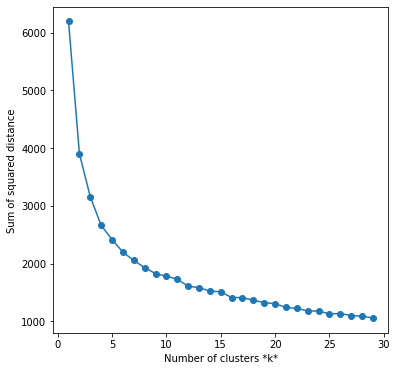

In [139]:
sse = [ ]
list_k = list(range(1, 30))

for k in list_k :
    km = KMeans(n_clusters=k,init="k-means++",max_iter=700)
    km.fit(mumbai_categories)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


In [140]:

# # dropping stores regular restaurants and cafes as they are quite abundant and available in each areas


# K-Means Clustering

In [141]:
# set number of clusters
kclusters = 10

mumbai_grouped_clustering = neighborhood_categories_grouped.drop('Neighborhood', axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, init="k-means++")
kmeans.fit(mumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([5, 8, 3, 3, 8, 8, 8, 3, 7, 0])

In [142]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [143]:
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label,price_binned
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft,6
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft,2
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft,6
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft,1
4,Mumbai South,Adarsh Nagar,19.0147,72.8216,36252.0,Adarsh Nagar -Rs.36252.0/sq.ft,9


In [144]:
mumbai_df = avg_price_plot.copy()
mumbai_df.rename(columns = {"neighborhood":"Neighborhood","latitude":"Latitude","longitude":"Longitude"},inplace = True)
mumbai_df.head()

,sub_city,Neighborhood,Latitude,Longitude,Avg_price,price_label,price_binned
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft,6
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft,2
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft,6
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft,1
4,Mumbai South,Adarsh Nagar,19.0147,72.8216,36252.0,Adarsh Nagar -Rs.36252.0/sq.ft,9


In [145]:
mumbai_df.shape

(775, 7)

In [146]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mumbai_merged = mumbai_df[["sub_city", "Neighborhood", "Latitude", "Longitude", "Avg_price"]]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mumbai_merged = mumbai_merged.merge(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mumbai_merged.head() # check the last columns!

,sub_city,Neighborhood,Latitude,Longitude,Avg_price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,5,stores_daily_conveniences,sports_fitness,bars_nightlife,kids_family_residential,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,nature_view,education_colleges
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,8,tourist_interest,sports_fitness,transport_vicinity,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,3,stores_daily_conveniences,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
3,Mumbai South,Adarsh Nagar,19.0147,72.8216,36252.0,3,stores_daily_conveniences,nature_view,transport_vicinity,tourist_interest,sports_fitness,shopping,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
4,Mumbai Thane,Adharwadi,19.2570,73.1240,5291.0,8,sports_fitness,transport_vicinity,tourist_interest,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub


In [147]:
neighborhoods_venues_sorted["Cluster Labels"].unique()

array([5, 8, 3, 7, 0, 2, 9, 4, 1, 6])

In [148]:
mumbai_merged["Cluster Labels"].unique()

array([5, 8, 3, 7, 0, 2, 9, 4, 1, 6])

In [149]:
mumbai_merged.shape

(685, 16)

In [150]:
mumbai_clustered = mumbai_merged[["sub_city", "Neighborhood", "Latitude", "Longitude", "Avg_price", "Cluster Labels"]].sort_values(by = "Neighborhood")
mumbai_clustered.head(20)

,sub_city,Neighborhood,Latitude,Longitude,Avg_price,Cluster Labels
0,Mira Road And Beyond,4 Bunglows,19.12470,72.826400,23588.0,5
1,Mira Road And Beyond,Aarey Milk Colony,19.15100,72.883100,7650.0,8
2,Mumbai South,Abhyudaya Nagar,18.99140,72.844200,26583.5,3
3,Mumbai South,Adarsh Nagar,19.01470,72.821600,36252.0,3
4,Mumbai Thane,Adharwadi,19.25700,73.124000,5291.0,8
5,Mumbai Beyond Thane,Agashi,19.46040,72.774700,4292.0,8
6,Mumbai Andheri-Dahisar,Akurli Nagar,19.19970,72.858900,18445.0,8
7,Mumbai Andheri-Dahisar,Alika Nagar,19.19800,72.870700,15194.0,3
8,Mumbai Navi,Altamount Road,19.07609,72.877426,42776.5,7
9,Mumbai Beyond Thane,Ambawadi,19.24110,72.860000,4314.0,0


In [151]:
mumbai_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sub_city        685 non-null    object 
 1   Neighborhood    685 non-null    object 
 2   Latitude        685 non-null    float64
 3   Longitude       685 non-null    float64
 4   Avg_price       685 non-null    float64
 5   Cluster Labels  685 non-null    int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 34.8+ KB


In [152]:
mumbai_clustered.loc[(mumbai_clustered["Cluster Labels"] == 0) & (mumbai_clustered["Neighborhood"] == "Churchgate")]

,sub_city,Neighborhood,Latitude,Longitude,Avg_price,Cluster Labels


In [153]:
mumbai_clustered["Cluster Labels"].isnull().sum()

0

In [154]:
mumbai_clustered.loc[mumbai_clustered["Cluster Labels"] == 0 ]["sub_city"].value_counts().reset_index().rename(columns = {"index":"subcity","sub_city":"count"})

,subcity,count
0,Mumbai Navi,114
1,Mumbai Beyond Thane,44
2,Mumbai Thane,35
3,Mumbai Andheri-Dahisar,30
4,Mira Road And Beyond,23
5,Central Mumbai suburbs,20
6,Mumbai Harbour,6
7,Mumbai South,6
8,Mumbai South West,2


In [155]:
# cluster_subcity_dict = {"cluster":[],"subcity":[],"count":[]}
cluster_subcity_df = pd.DataFrame()
for i in range(10):
    cluster_subcity_pd = pd.DataFrame()
    cluster_subcity_pd = mumbai_clustered.loc[mumbai_clustered["Cluster Labels"] == i ]["sub_city"].value_counts().reset_index().rename(columns = {"index":"subcity","sub_city":"count"})
    cluster_subcity_pd["cluster"] = i
    cluster_subcity_df = cluster_subcity_df.append(cluster_subcity_pd)
cluster_subcity_df.head(10)

,subcity,count,cluster
0,Mumbai Navi,114,0
1,Mumbai Beyond Thane,44,0
2,Mumbai Thane,35,0
3,Mumbai Andheri-Dahisar,30,0
4,Mira Road And Beyond,23,0
5,Central Mumbai suburbs,20,0
6,Mumbai Harbour,6,0
7,Mumbai South,6,0
8,Mumbai South West,2,0
0,Mumbai Andheri-Dahisar,6,1


In [156]:
# cluster_subcity_dict = {"cluster":[],"subcity":[],"count":[]}
# for i in range(10):
#     subcities = list(mumbai_clustered.loc[mumbai_clustered["Cluster Labels"] == i ]["sub_city"].unique())
#     for subcity in subcities:
#         count = len(mumbai_clustered.loc[mumbai_clustered["sub_city"] == subcity])
#         cluster_subcity_dict["cluster"].append(i)
#         cluster_subcity_dict["subcity"].append(subcity)
#         cluster_subcity_dict["count"].append(count)
# cluster_subcity_df = pd.DataFrame(cluster_subcity_dict)
# cluster_subcity_df.head(10)

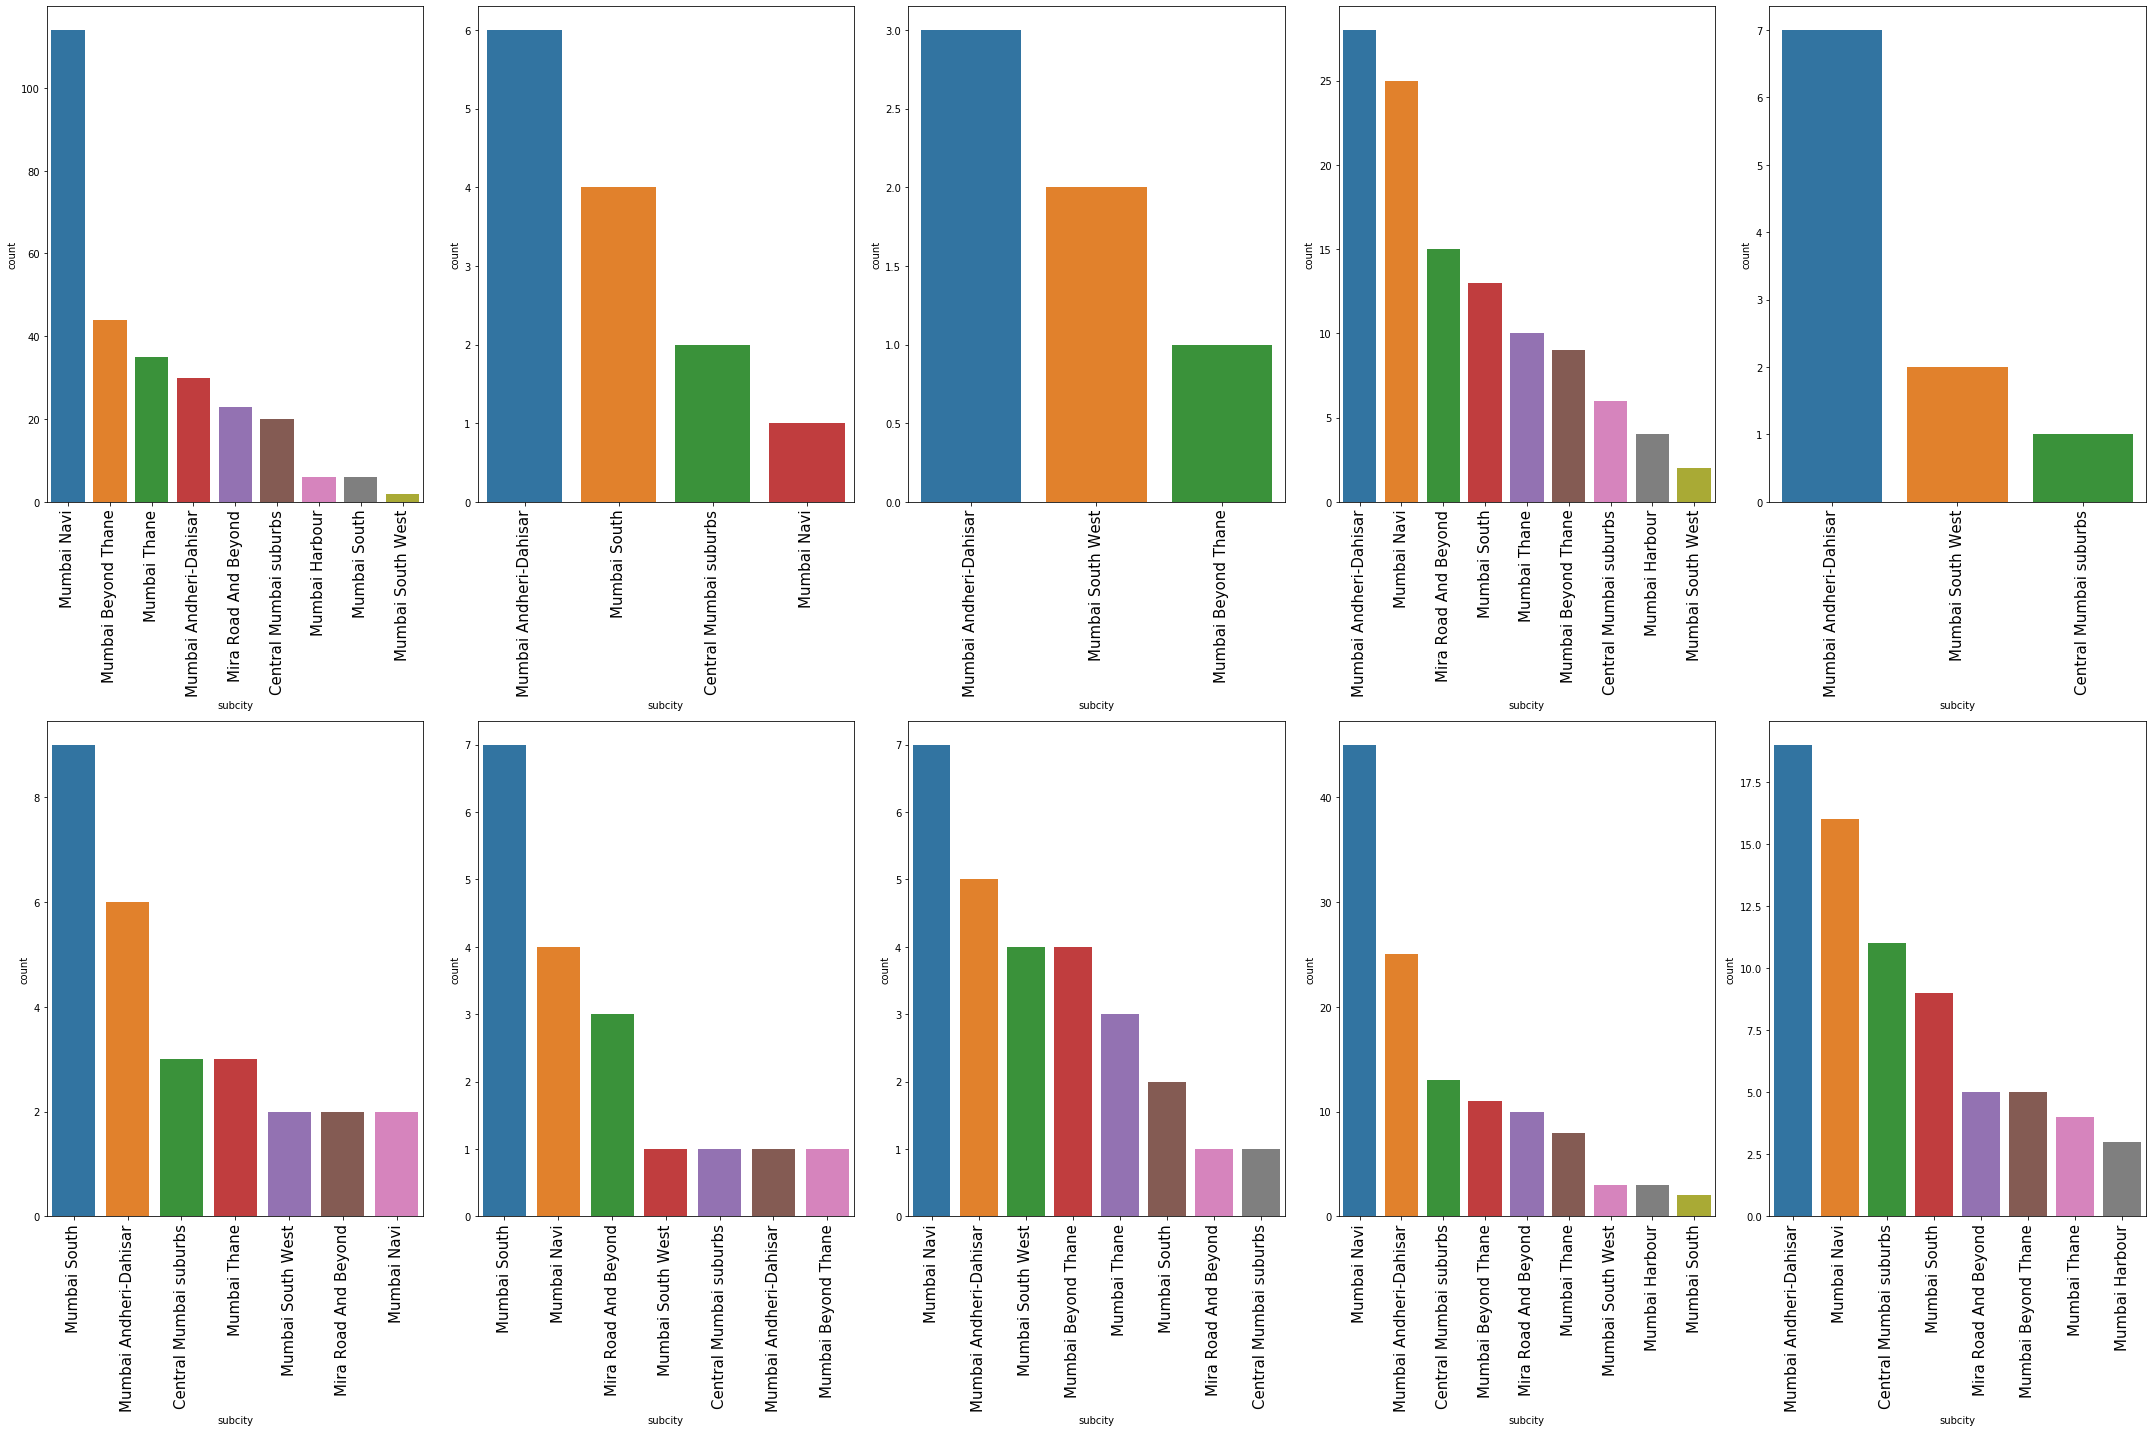

In [157]:
fig, ax = plt.subplots(2,5, figsize = (30,20))
for cluster in range(kclusters):
    sns.barplot(x = cluster_subcity_df.loc[cluster_subcity_df["cluster"] == cluster,"subcity"],y = cluster_subcity_df.loc[cluster_subcity_df["cluster"] == cluster,"count"], ax = ax.flat[cluster])
    ax.flat[cluster].set_xticklabels(labels = ax.flat[cluster].get_xticklabels(), rotation = 90, fontsize = 15)
    

plt.tight_layout()
plt.show()

In [158]:
mumbai_clustered.groupby("Cluster Labels")["Avg_price"].sum().sort_values(ascending = False).reset_index()

,Cluster Labels,Avg_price
0,0,2770793.5
1,3,1580000.0
2,8,1484696.0
3,9,1080861.0
4,5,578490.0
5,7,468137.5
6,6,390491.0
7,1,334539.5
8,4,220575.0
9,2,149111.5


In [159]:
mumbai_clustered.groupby("Cluster Labels")["Avg_price"].mean().sort_values(ascending = False).reset_index()

,Cluster Labels,Avg_price
0,1,25733.807692
1,2,24851.916667
2,4,22057.500000
3,6,21693.944444
4,5,21425.555556
5,7,17338.425926
6,9,15011.958333
7,3,14107.142857
8,8,12372.466667
9,0,9895.691071


It may mean Cluster 0 have Some very High Price Appartments (capped outliers: Posh South Mumbai Society)

In [160]:
mumbai_clustered.groupby("Cluster Labels")["Neighborhood"].count().sort_values(ascending = False).reset_index()

,Cluster Labels,Neighborhood
0,0,280
1,8,120
2,3,112
3,9,72
4,7,27
5,5,27
6,6,18
7,1,13
8,4,10
9,2,6


Cluster label 5 has the most neighborhood (281)

In [161]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow_r(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_clustered['Latitude'], mumbai_clustered['Longitude'], mumbai_clustered['Neighborhood'], mumbai_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

# map_clusters.save(outfile= "Map_Clusters.html")
# map_clusters
### find Map in Week 5/ Maps_Html

In [162]:
cluster_map = mumbai_clustered.groupby("Cluster Labels")["Neighborhood"].count().reset_index()
cluster_map

,Cluster Labels,Neighborhood
0,0,280
1,1,13
2,2,6
3,3,112
4,4,10
5,5,27
6,6,18
7,7,27
8,8,120
9,9,72


In [163]:
# Same Colour Pallete as that of above Map
colour = [rainbow[i-1] for i in cluster_map["Cluster Labels"]]
colour

['#8000ff',
 '#ff0000',
 '#ff562c',
 '#ffa256',
 '#d5dd7f',
 '#9cfba4',
 '#62fbc4',
 '#2bdddd',
 '#10a2f0',
 '#4756fb']

### Legend for above Map

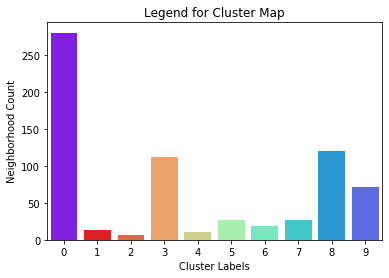

<Figure size 432x288 with 0 Axes>

In [164]:
fig, ax = plt.subplots()
bar = sns.barplot(x = cluster_map["Cluster Labels"],y = cluster_map["Neighborhood"],palette = colour, ax= ax)
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Neighborhood Count")
ax.set_title("Legend for Cluster Map")

plt.show()
# ax.legend(handles = bar)
plt.savefig("Legend_Cluster.jpg")

In [165]:
venue_mapping["Venue Mapping"].unique()

array(['stores_daily_conveniences', 'regular_restaurants',
       'transport_vicinity', 'arts_culture_recreation', 'shopping',
       'nature_view', 'sports_fitness', 'cafe_fastfoods',
       'bars_nightlife', 'cuisine_restaurants', 'tourist_interest',
       'kids_family_residential', 'business_hub', 'education_colleges'],
      dtype=object)

In [166]:
# def frq_table(cluster_df):
#     freq = { }
#     for i in range(cluster_df.shape[0]):
#         for j in range(2,cluster_df.shape[1]):
#             if cluster_df.iloc[i,j] in freq:
#                 freq[cluster_df.iloc[i,j]] += 1
#             else:
#                 freq[cluster_df.iloc[i,j]] = 1
#     return freq

## Cluster 0

In [167]:
cluster_0 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 0, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_0.shape)
cluster_0

(280, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Ambawadi,0,transport_vicinity,stores_daily_conveniences,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
11,Ambernath East,0,transport_vicinity,nature_view,tourist_interest,stores_daily_conveniences,sports_fitness,shopping,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
12,Ambivali West,0,transport_vicinity,tourist_interest,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
14,Amboli,0,transport_vicinity,tourist_interest,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
17,Andheri (East),0,tourist_interest,transport_vicinity,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
20,Antop Hill,0,transport_vicinity,tourist_interest,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
21,Aptewadi,0,stores_daily_conveniences,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
23,Asangaon,0,transport_vicinity,tourist_interest,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
24,Ashok Nagar,0,stores_daily_conveniences,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
28,Babhai,0,stores_daily_conveniences,kids_family_residential,arts_culture_recreation,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,education_colleges,cuisine_restaurants


## Cluster 1

In [168]:
cluster_1 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 1, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_1.shape)
cluster_1

(13, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Bandra (West),1,stores_daily_conveniences,sports_fitness,bars_nightlife,cuisine_restaurants,arts_culture_recreation,kids_family_residential,tourist_interest,education_colleges,transport_vicinity,shopping
58,Breach Candy,1,stores_daily_conveniences,bars_nightlife,sports_fitness,tourist_interest,kids_family_residential,cuisine_restaurants,transport_vicinity,shopping,nature_view,education_colleges
80,Churchgate,1,tourist_interest,stores_daily_conveniences,sports_fitness,bars_nightlife,cuisine_restaurants,nature_view,arts_culture_recreation,transport_vicinity,education_colleges,shopping
107,Dindoshi,1,stores_daily_conveniences,bars_nightlife,shopping,arts_culture_recreation,nature_view,cuisine_restaurants,tourist_interest,sports_fitness,transport_vicinity,kids_family_residential
115,Ekta Nagar,1,stores_daily_conveniences,bars_nightlife,cuisine_restaurants,sports_fitness,shopping,arts_culture_recreation,transport_vicinity,tourist_interest,nature_view,kids_family_residential
160,Hiranandani Gardens - Powai,1,stores_daily_conveniences,bars_nightlife,sports_fitness,shopping,tourist_interest,cuisine_restaurants,transport_vicinity,nature_view,kids_family_residential,education_colleges
188,Kajupada,1,stores_daily_conveniences,bars_nightlife,shopping,cuisine_restaurants,arts_culture_recreation,sports_fitness,kids_family_residential,transport_vicinity,tourist_interest,nature_view
274,Malad (West),1,stores_daily_conveniences,bars_nightlife,sports_fitness,cuisine_restaurants,tourist_interest,shopping,arts_culture_recreation,transport_vicinity,nature_view,kids_family_residential
292,Mindspace,1,stores_daily_conveniences,cuisine_restaurants,bars_nightlife,sports_fitness,shopping,arts_culture_recreation,transport_vicinity,tourist_interest,nature_view,kids_family_residential
349,Panchkutir Ganesh Nagar,1,stores_daily_conveniences,bars_nightlife,cuisine_restaurants,sports_fitness,tourist_interest,shopping,kids_family_residential,arts_culture_recreation,transport_vicinity,nature_view


## Cluster 2

In [169]:
cluster_2 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 2, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_2.shape)
cluster_2

(6, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Andheri (West),2,bars_nightlife,cuisine_restaurants,stores_daily_conveniences,arts_culture_recreation,sports_fitness,tourist_interest,transport_vicinity,shopping,nature_view,kids_family_residential
223,Khar,2,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,sports_fitness,transport_vicinity,arts_culture_recreation,tourist_interest,shopping,nature_view,kids_family_residential
224,Khar West,2,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,sports_fitness,transport_vicinity,arts_culture_recreation,tourist_interest,shopping,nature_view,kids_family_residential
589,Shastri Nagar,2,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,sports_fitness,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,kids_family_residential,nature_view
590,Shastri Nagar,2,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,sports_fitness,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,kids_family_residential,nature_view
608,Sundervan Complex,2,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,sports_fitness,arts_culture_recreation,tourist_interest,kids_family_residential,transport_vicinity,shopping,nature_view


## Cluster 3

In [170]:
cluster_3 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 3, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_3.shape)
cluster_3

(112, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Abhyudaya Nagar,3,stores_daily_conveniences,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
3,Adarsh Nagar,3,stores_daily_conveniences,nature_view,transport_vicinity,tourist_interest,sports_fitness,shopping,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
7,Alika Nagar,3,stores_daily_conveniences,sports_fitness,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
13,Ambivli,3,transport_vicinity,stores_daily_conveniences,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
37,Bangur Nagar,3,stores_daily_conveniences,sports_fitness,transport_vicinity,tourist_interest,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
42,Bhabola,3,stores_daily_conveniences,bars_nightlife,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
47,Bhandup (West),3,stores_daily_conveniences,shopping,bars_nightlife,arts_culture_recreation,transport_vicinity,tourist_interest,sports_fitness,nature_view,kids_family_residential,education_colleges
54,Bonkode,3,stores_daily_conveniences,bars_nightlife,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
55,Borivali (East),3,stores_daily_conveniences,transport_vicinity,nature_view,kids_family_residential,tourist_interest,sports_fitness,shopping,education_colleges,cuisine_restaurants,business_hub
60,Byculla,3,stores_daily_conveniences,tourist_interest,bars_nightlife,transport_vicinity,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants


## Cluster 4

In [171]:
cluster_4 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 4, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_4.shape)
cluster_4

(10, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Aram Nagar,4,bars_nightlife,stores_daily_conveniences,sports_fitness,nature_view,kids_family_residential,cuisine_restaurants,transport_vicinity,tourist_interest,shopping,education_colleges
26,Azad Nagar,4,bars_nightlife,sports_fitness,transport_vicinity,tourist_interest,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
165,Industrial Area,4,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,sports_fitness,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,nature_view,kids_family_residential
182,Juhu,4,bars_nightlife,stores_daily_conveniences,tourist_interest,sports_fitness,nature_view,cuisine_restaurants,arts_culture_recreation,transport_vicinity,shopping,kids_family_residential
254,Link Road,4,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,sports_fitness,arts_culture_recreation,kids_family_residential,transport_vicinity,tourist_interest,shopping,nature_view
340,Orlem,4,bars_nightlife,stores_daily_conveniences,tourist_interest,sports_fitness,kids_family_residential,cuisine_restaurants,transport_vicinity,shopping,nature_view,education_colleges
580,Seven Bunglow,4,bars_nightlife,stores_daily_conveniences,sports_fitness,transport_vicinity,tourist_interest,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
638,Ushma Nagar,4,bars_nightlife,stores_daily_conveniences,sports_fitness,kids_family_residential,cuisine_restaurants,transport_vicinity,tourist_interest,shopping,nature_view,education_colleges
654,Veera Desai Road,4,bars_nightlife,stores_daily_conveniences,cuisine_restaurants,sports_fitness,tourist_interest,transport_vicinity,shopping,nature_view,kids_family_residential,education_colleges
661,Vile Parle (East),4,bars_nightlife,tourist_interest,transport_vicinity,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants


## Cluster 5

In [172]:
cluster_5 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 5, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_5.shape)
cluster_5

(27, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4 Bunglows,5,stores_daily_conveniences,sports_fitness,bars_nightlife,kids_family_residential,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,nature_view,education_colleges
15,Amrut Nagar,5,stores_daily_conveniences,cuisine_restaurants,sports_fitness,shopping,bars_nightlife,arts_culture_recreation,transport_vicinity,tourist_interest,nature_view,kids_family_residential
66,Chamundeshwari Nagar,5,stores_daily_conveniences,cuisine_restaurants,bars_nightlife,tourist_interest,sports_fitness,shopping,transport_vicinity,nature_view,kids_family_residential,education_colleges
71,Chembur,5,stores_daily_conveniences,nature_view,arts_culture_recreation,transport_vicinity,tourist_interest,sports_fitness,shopping,kids_family_residential,education_colleges,cuisine_restaurants
72,Chembur (East),5,stores_daily_conveniences,nature_view,arts_culture_recreation,transport_vicinity,tourist_interest,sports_fitness,shopping,kids_family_residential,education_colleges,cuisine_restaurants
87,Dadar (West),5,stores_daily_conveniences,bars_nightlife,sports_fitness,cuisine_restaurants,shopping,nature_view,kids_family_residential,arts_culture_recreation,transport_vicinity,tourist_interest
149,Haji Ali,5,stores_daily_conveniences,shopping,cuisine_restaurants,bars_nightlife,nature_view,transport_vicinity,tourist_interest,sports_fitness,kids_family_residential,education_colleges
163,I C Colony,5,stores_daily_conveniences,sports_fitness,bars_nightlife,transport_vicinity,tourist_interest,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
217,Kemps Corner,5,stores_daily_conveniences,cuisine_restaurants,bars_nightlife,transport_vicinity,sports_fitness,kids_family_residential,arts_culture_recreation,tourist_interest,shopping,nature_view
256,Lokhandwala Andheri West,5,stores_daily_conveniences,sports_fitness,nature_view,transport_vicinity,tourist_interest,shopping,kids_family_residential,education_colleges,cuisine_restaurants,business_hub


## Cluster 6

In [173]:
cluster_6 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 6, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_6.shape)
cluster_6

(18, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
127,Garodia Nagar,6,sports_fitness,stores_daily_conveniences,kids_family_residential,nature_view,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,education_colleges,cuisine_restaurants
262,Mahajan Wadi,6,stores_daily_conveniences,arts_culture_recreation,sports_fitness,shopping,bars_nightlife,transport_vicinity,tourist_interest,nature_view,kids_family_residential,education_colleges
264,Mahalaxmi,6,arts_culture_recreation,tourist_interest,bars_nightlife,sports_fitness,cuisine_restaurants,transport_vicinity,stores_daily_conveniences,shopping,nature_view,kids_family_residential
265,Mahalaxmi Sindhi Colony,6,stores_daily_conveniences,arts_culture_recreation,transport_vicinity,nature_view,kids_family_residential,cuisine_restaurants,tourist_interest,sports_fitness,shopping,education_colleges
266,Maharashtra Nagar,6,stores_daily_conveniences,sports_fitness,kids_family_residential,cuisine_restaurants,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,nature_view,education_colleges
267,Maharashtra Nagar,6,stores_daily_conveniences,sports_fitness,kids_family_residential,cuisine_restaurants,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,nature_view,education_colleges
270,Mahim (West),6,stores_daily_conveniences,arts_culture_recreation,sports_fitness,nature_view,bars_nightlife,transport_vicinity,tourist_interest,shopping,kids_family_residential,education_colleges
281,Marine Drive,6,arts_culture_recreation,stores_daily_conveniences,sports_fitness,transport_vicinity,tourist_interest,nature_view,cuisine_restaurants,bars_nightlife,shopping,kids_family_residential
282,Marine Lines,6,arts_culture_recreation,stores_daily_conveniences,sports_fitness,transport_vicinity,tourist_interest,nature_view,cuisine_restaurants,bars_nightlife,shopping,kids_family_residential
287,Matunga West,6,stores_daily_conveniences,nature_view,arts_culture_recreation,transport_vicinity,sports_fitness,kids_family_residential,cuisine_restaurants,tourist_interest,shopping,education_colleges


## Cluster 7

In [174]:
cluster_7 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 7, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_7.shape)
cluster_7

(27, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Altamount Road,7,cuisine_restaurants,stores_daily_conveniences,sports_fitness,nature_view,transport_vicinity,tourist_interest,shopping,kids_family_residential,education_colleges,business_hub
10,Ambedkar Nagar,7,sports_fitness,cuisine_restaurants,stores_daily_conveniences,bars_nightlife,transport_vicinity,tourist_interest,shopping,nature_view,kids_family_residential,education_colleges
16,Anand Nagar,7,cuisine_restaurants,stores_daily_conveniences,kids_family_residential,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,education_colleges,business_hub
36,Bandra Kurla Complex,7,cuisine_restaurants,tourist_interest,bars_nightlife,stores_daily_conveniences,sports_fitness,arts_culture_recreation,transport_vicinity,shopping,nature_view,kids_family_residential
65,Chakradhar Nagar,7,cuisine_restaurants,stores_daily_conveniences,sports_fitness,nature_view,transport_vicinity,tourist_interest,shopping,kids_family_residential,education_colleges,business_hub
76,Chikholi,7,cuisine_restaurants,stores_daily_conveniences,sports_fitness,nature_view,transport_vicinity,tourist_interest,shopping,kids_family_residential,education_colleges,business_hub
83,Cuffe Parade,7,stores_daily_conveniences,cuisine_restaurants,bars_nightlife,tourist_interest,sports_fitness,transport_vicinity,shopping,nature_view,kids_family_residential,education_colleges
118,Film City Road,7,cuisine_restaurants,stores_daily_conveniences,sports_fitness,nature_view,transport_vicinity,tourist_interest,shopping,kids_family_residential,education_colleges,business_hub
120,Gamdevi,7,stores_daily_conveniences,tourist_interest,cuisine_restaurants,bars_nightlife,nature_view,arts_culture_recreation,transport_vicinity,sports_fitness,shopping,kids_family_residential
122,Gandhi Nagar,7,stores_daily_conveniences,sports_fitness,cuisine_restaurants,bars_nightlife,arts_culture_recreation,transport_vicinity,tourist_interest,shopping,nature_view,kids_family_residential


## Cluster 8

In [175]:
cluster_8 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 8, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_8.shape)
cluster_8

(120, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Aarey Milk Colony,8,tourist_interest,sports_fitness,transport_vicinity,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
4,Adharwadi,8,sports_fitness,transport_vicinity,tourist_interest,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
5,Agashi,8,stores_daily_conveniences,sports_fitness,nature_view,transport_vicinity,tourist_interest,shopping,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
6,Akurli Nagar,8,shopping,sports_fitness,kids_family_residential,arts_culture_recreation,transport_vicinity,tourist_interest,stores_daily_conveniences,nature_view,education_colleges,cuisine_restaurants
25,Ashok Nagar Kandivali,8,kids_family_residential,sports_fitness,transport_vicinity,tourist_interest,stores_daily_conveniences,shopping,nature_view,education_colleges,cuisine_restaurants,business_hub
27,Azde Gaon,8,stores_daily_conveniences,sports_fitness,nature_view,transport_vicinity,tourist_interest,shopping,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
30,Badlapur (East),8,stores_daily_conveniences,sports_fitness,transport_vicinity,tourist_interest,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub
34,Bandra (East),8,sports_fitness,bars_nightlife,arts_culture_recreation,transport_vicinity,tourist_interest,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges
45,Bhakti Park,8,sports_fitness,transport_vicinity,stores_daily_conveniences,cuisine_restaurants,arts_culture_recreation,tourist_interest,shopping,nature_view,kids_family_residential,education_colleges
56,Borivali (West),8,kids_family_residential,stores_daily_conveniences,sports_fitness,cuisine_restaurants,transport_vicinity,tourist_interest,shopping,nature_view,education_colleges,business_hub


## Cluster 9

In [176]:
cluster_9 = pd.DataFrame(mumbai_merged.loc[mumbai_merged['Cluster Labels'] == 9, mumbai_merged.columns[[1] + list(range(5, mumbai_merged.shape[1]))]])
print(cluster_9.shape)
cluster_9

(72, 12)


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Andheri MIDC,9,tourist_interest,bars_nightlife,stores_daily_conveniences,transport_vicinity,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
43,Bhadra Nagar,9,bars_nightlife,transport_vicinity,tourist_interest,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
44,Bhagat Colony,9,tourist_interest,cuisine_restaurants,bars_nightlife,transport_vicinity,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges
51,Bhayander (West),9,nature_view,sports_fitness,bars_nightlife,transport_vicinity,tourist_interest,stores_daily_conveniences,shopping,kids_family_residential,education_colleges,cuisine_restaurants
61,Byculla East,9,bars_nightlife,transport_vicinity,tourist_interest,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
64,Chakala,9,tourist_interest,bars_nightlife,arts_culture_recreation,transport_vicinity,stores_daily_conveniences,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges
73,Chembur (West),9,shopping,cuisine_restaurants,bars_nightlife,transport_vicinity,tourist_interest,stores_daily_conveniences,sports_fitness,nature_view,kids_family_residential,education_colleges
78,Chincholi Bunder,9,stores_daily_conveniences,bars_nightlife,transport_vicinity,tourist_interest,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
85,Dadar,9,tourist_interest,stores_daily_conveniences,bars_nightlife,transport_vicinity,sports_fitness,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants
95,Dattaguru Nagar,9,bars_nightlife,sports_fitness,transport_vicinity,tourist_interest,stores_daily_conveniences,shopping,nature_view,kids_family_residential,education_colleges,cuisine_restaurants


## Determining the Frequency of each mapped category in every cluster

In [177]:
venue_mapping.head()

,Venue Category,Venue Mapping
0,Accessories Store,stores_daily_conveniences
1,Afghan Restaurant,regular_restaurants
2,African Restaurant,regular_restaurants
3,Airport Food Court,transport_vicinity
4,Airport Lounge,transport_vicinity


In [178]:
venue_mapping["Venue Mapping"].unique()

array(['stores_daily_conveniences', 'regular_restaurants',
       'transport_vicinity', 'arts_culture_recreation', 'shopping',
       'nature_view', 'sports_fitness', 'cafe_fastfoods',
       'bars_nightlife', 'cuisine_restaurants', 'tourist_interest',
       'kids_family_residential', 'business_hub', 'education_colleges'],
      dtype=object)

In [179]:

def freq_table(cluster_df):
    df = pd.DataFrame()
    freq = { }
    for i in range(cluster_df.shape[0]):
        for j in range(2,cluster_df.shape[1]):
            if cluster_df.iloc[i,j] in freq:
                freq[cluster_df.iloc[i,j]] += 1
            else:
                freq[cluster_df.iloc[i,j]] = 1
    
    df = df.append(pd.DataFrame({"Cluster": int(cluster_df["Cluster Labels"].mean()),"Categories":[i for i in freq.keys()],"Frequency":[i for i in freq.values()]})).sort_values("Frequency", ascending = False).reset_index(drop = True)
    return df

In [180]:
cluster_list = [cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9]
cluster_category_freq = pd.DataFrame()
for i in cluster_list:
    cluster_category_freq = cluster_category_freq.append(freq_table(i))
cluster_category_freq = cluster_category_freq.reset_index(drop = True)

In [181]:
cluster_category_freq

,Cluster,Categories,Frequency
0,0,transport_vicinity,280
1,0,stores_daily_conveniences,280
2,0,tourist_interest,280
3,0,sports_fitness,280
4,0,shopping,280
5,0,nature_view,280
6,0,kids_family_residential,280
7,0,education_colleges,280
8,0,cuisine_restaurants,280
9,0,business_hub,240


In [182]:
cluster_category_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Cluster     114 non-null    int64 
 1   Categories  114 non-null    object
 2   Frequency   114 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.8+ KB


### Considering all Categories in a cluster

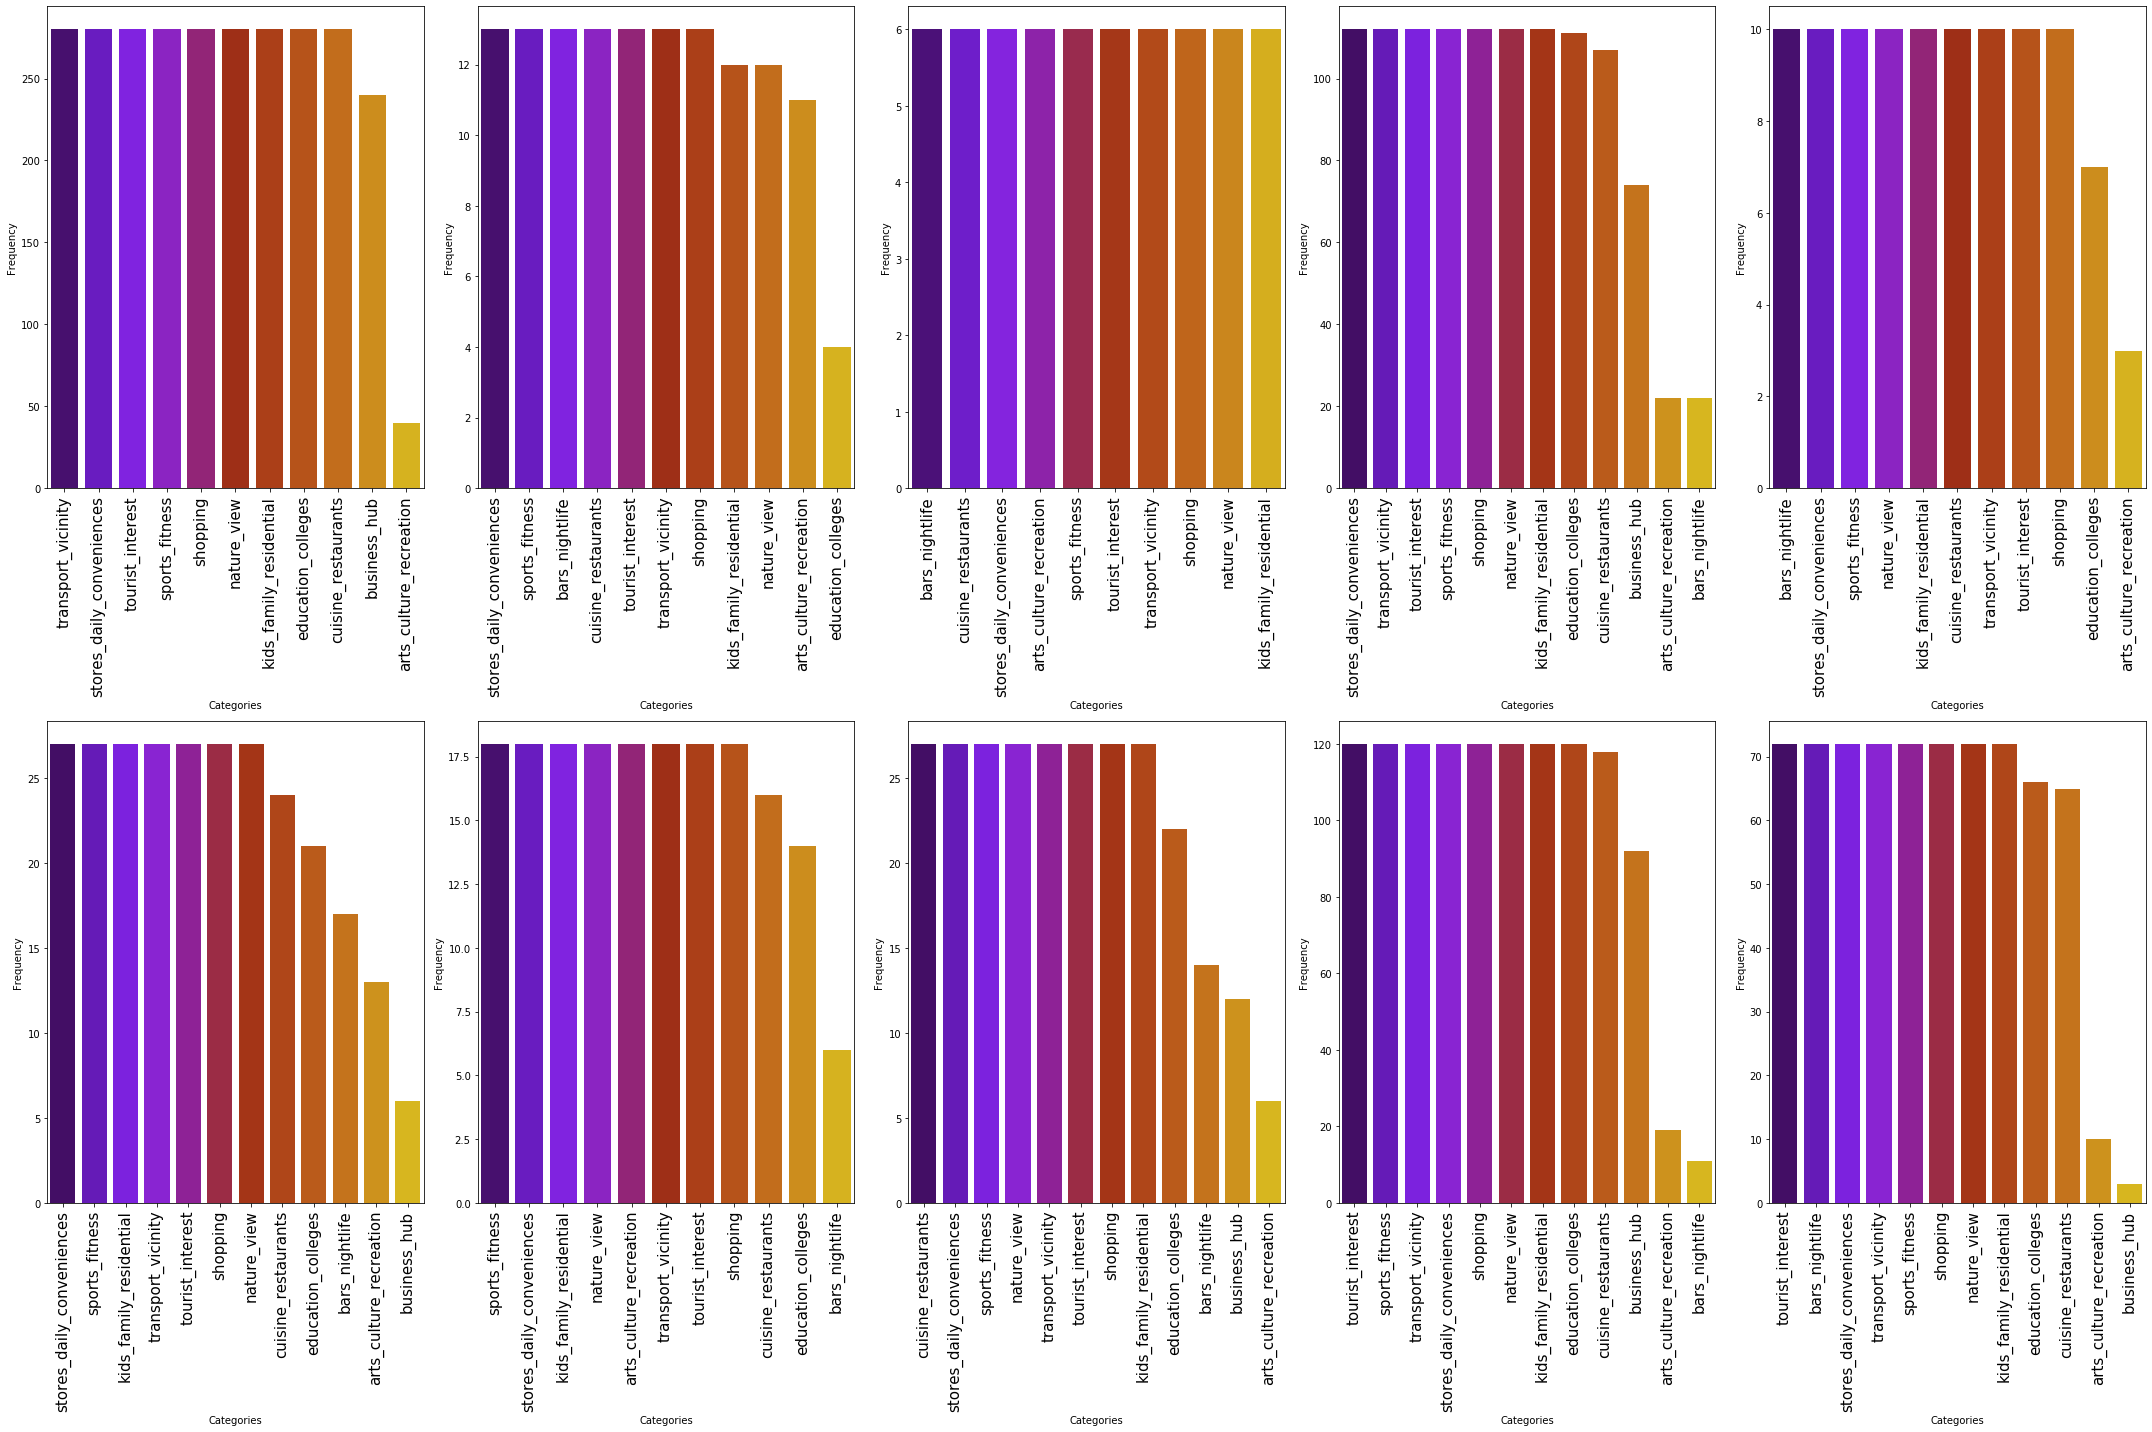

In [183]:
fig, ax = plt.subplots(2,5, figsize = (30,20))
for cluster in range(kclusters):
    sns.barplot(x = cluster_category_freq.loc[cluster_category_freq["Cluster"] == cluster,"Categories"],y = cluster_category_freq.loc[cluster_category_freq["Cluster"] == cluster,"Frequency"], ax = ax.flat[cluster], palette = "gnuplot")
    ax.flat[cluster].set_xticklabels(labels = ax.flat[cluster].get_xticklabels(), rotation = 90, fontsize = 15)

plt.tight_layout()
plt.show()

In [184]:
cluster_category_freq.loc[cluster_category_freq["Cluster"] == 0,"Frequency"]

0     280
1     280
2     280
3     280
4     280
5     280
6     280
7     280
8     280
9     240
10     40
Name: Frequency, dtype: int64

It is not that clear as what type of surrounding is in each cluster

### Considering 3 most common venue as we got earlier and segregating them into their cluster

In [185]:
cluster_label_1=mumbai_merged[['Cluster Labels','1st Most Common Venue','Neighborhood']].groupby(['Cluster Labels','1st Most Common Venue'],as_index=False).count().sort_values(['Cluster Labels','Neighborhood'],ascending=False)

cluster_label_1.rename(columns={'1st Most Common Venue':'Common Venue'},inplace=True)
# cluster_label_1 = cluster_label_1[cluster_label_1["Neighborhood"] > cluster_label_1["Neighborhood"].mean()]

cluster_label_1.head()

,Cluster Labels,Common Venue,Neighborhood
36,9,stores_daily_conveniences,23
32,9,bars_nightlife,22
37,9,tourist_interest,9
38,9,transport_vicinity,8
34,9,nature_view,5


In [186]:
cluster_label_2=mumbai_merged[['Cluster Labels','2nd Most Common Venue','Neighborhood']].groupby(['Cluster Labels','2nd Most Common Venue'],as_index=False).count().sort_values(['Cluster Labels','Neighborhood'],ascending=False)
cluster_label_2.rename(columns={'2nd Most Common Venue':'Common Venue'},inplace=True)
# cluster_label_2 = cluster_label_2[cluster_label_2["Neighborhood"] > cluster_label_2["Neighborhood"].mean()]

cluster_label_2.head()

,Cluster Labels,Common Venue,Neighborhood
58,9,bars_nightlife,23
65,9,stores_daily_conveniences,10
60,9,cuisine_restaurants,8
67,9,transport_vicinity,8
62,9,nature_view,6


In [187]:

cluster_label_3=mumbai_merged[['Cluster Labels','3rd Most Common Venue','Neighborhood']].groupby(['Cluster Labels','3rd Most Common Venue'],as_index=False).count().sort_values(['Cluster Labels','Neighborhood'],ascending=False)
cluster_label_3.rename(columns={'3rd Most Common Venue':'Common Venue'},inplace=True)
# cluster_label_3 = cluster_label_3[cluster_label_3["Neighborhood"] > cluster_label_3["Neighborhood"].mean()]
cluster_label_3.head()

,Cluster Labels,Common Venue,Neighborhood
62,9,bars_nightlife,19
70,9,transport_vicinity,18
69,9,tourist_interest,11
68,9,stores_daily_conveniences,6
67,9,sports_fitness,5


In [188]:
sorted(cluster_label_3["Common Venue"].unique())

['arts_culture_recreation',
 'bars_nightlife',
 'business_hub',
 'cuisine_restaurants',
 'education_colleges',
 'kids_family_residential',
 'nature_view',
 'shopping',
 'sports_fitness',
 'stores_daily_conveniences',
 'tourist_interest',
 'transport_vicinity']

In [189]:
sorted(cluster_label_3[cluster_label_3["Neighborhood"] > cluster_label_3["Neighborhood"].mean()]["Common Venue"].unique())

['arts_culture_recreation',
 'bars_nightlife',
 'cuisine_restaurants',
 'sports_fitness',
 'stores_daily_conveniences',
 'tourist_interest',
 'transport_vicinity']

In [190]:
cluster_label =pd.concat([cluster_label_1,cluster_label_2,cluster_label_3])
cluster_label=cluster_label.groupby(['Cluster Labels','Common Venue'],as_index=False).sum()
cluster_label

,Cluster Labels,Common Venue,Neighborhood
0,0,arts_culture_recreation,39
1,0,business_hub,4
2,0,cuisine_restaurants,29
3,0,kids_family_residential,37
4,0,nature_view,34
5,0,shopping,11
6,0,stores_daily_conveniences,199
7,0,tourist_interest,223
8,0,transport_vicinity,264
9,1,bars_nightlife,10


### Obtain unique Venues in every clusters

In [191]:
for cluster in range(kclusters):
    print("Cluster {}".format(cluster))
    print("-----------------------")
    common_venues = cluster_label[cluster_label["Cluster Labels"] == cluster]["Common Venue"].unique()
    print(len(common_venues))
    print(common_venues)
    print("\n")

Cluster 0
-----------------------
9
['arts_culture_recreation' 'business_hub' 'cuisine_restaurants'
 'kids_family_residential' 'nature_view' 'shopping'
 'stores_daily_conveniences' 'tourist_interest' 'transport_vicinity']


Cluster 1
-----------------------
6
['bars_nightlife' 'cuisine_restaurants' 'shopping' 'sports_fitness'
 'stores_daily_conveniences' 'tourist_interest']


Cluster 2
-----------------------
3
['bars_nightlife' 'cuisine_restaurants' 'stores_daily_conveniences']


Cluster 3
-----------------------
11
['arts_culture_recreation' 'bars_nightlife' 'business_hub'
 'cuisine_restaurants' 'kids_family_residential' 'nature_view' 'shopping'
 'sports_fitness' 'stores_daily_conveniences' 'tourist_interest'
 'transport_vicinity']


Cluster 4
-----------------------
6
['bars_nightlife' 'cuisine_restaurants' 'sports_fitness'
 'stores_daily_conveniences' 'tourist_interest' 'transport_vicinity']


Cluster 5
-----------------------
10
['arts_culture_recreation' 'bars_nightlife' 'cuisine

In [192]:
# #cluster_label.loc[cluster_label[cluster_label["Cluster Labels"] == 1]["Neighborhood"]> cluster_label["Neighborhood"].mean(),:]
# a = cluster_label[cluster_label["Cluster Labels"] == 1]["Neighborhood"]

# print(np.percentile(a,50))
# a.sort_values()

In [193]:
top_cluster_venue = pd.DataFrame()
for cluster in range(kclusters):
    clustered = cluster_label[cluster_label["Cluster Labels"] == cluster]
    if cluster_label[cluster_label["Cluster Labels"] == cluster]["Common Venue"].nunique() > 6:
        top_cluster_venue = top_cluster_venue.append(clustered[cluster_label["Neighborhood"] > np.percentile(cluster_label["Neighborhood"],50)] )
    else:
        top_cluster_venue = top_cluster_venue.append(clustered)
top_cluster_venue

,Cluster Labels,Common Venue,Neighborhood
0,0,arts_culture_recreation,39
2,0,cuisine_restaurants,29
3,0,kids_family_residential,37
4,0,nature_view,34
5,0,shopping,11
6,0,stores_daily_conveniences,199
7,0,tourist_interest,223
8,0,transport_vicinity,264
9,1,bars_nightlife,10
10,1,cuisine_restaurants,6


In [194]:
top_cluster_venue.loc[cluster_label["Cluster Labels"] == cluster]#["Common Venue"]

,Cluster Labels,Common Venue,Neighborhood
72,9,bars_nightlife,64
74,9,cuisine_restaurants,12
76,9,nature_view,15
78,9,sports_fitness,11
79,9,stores_daily_conveniences,39
80,9,tourist_interest,23
81,9,transport_vicinity,34


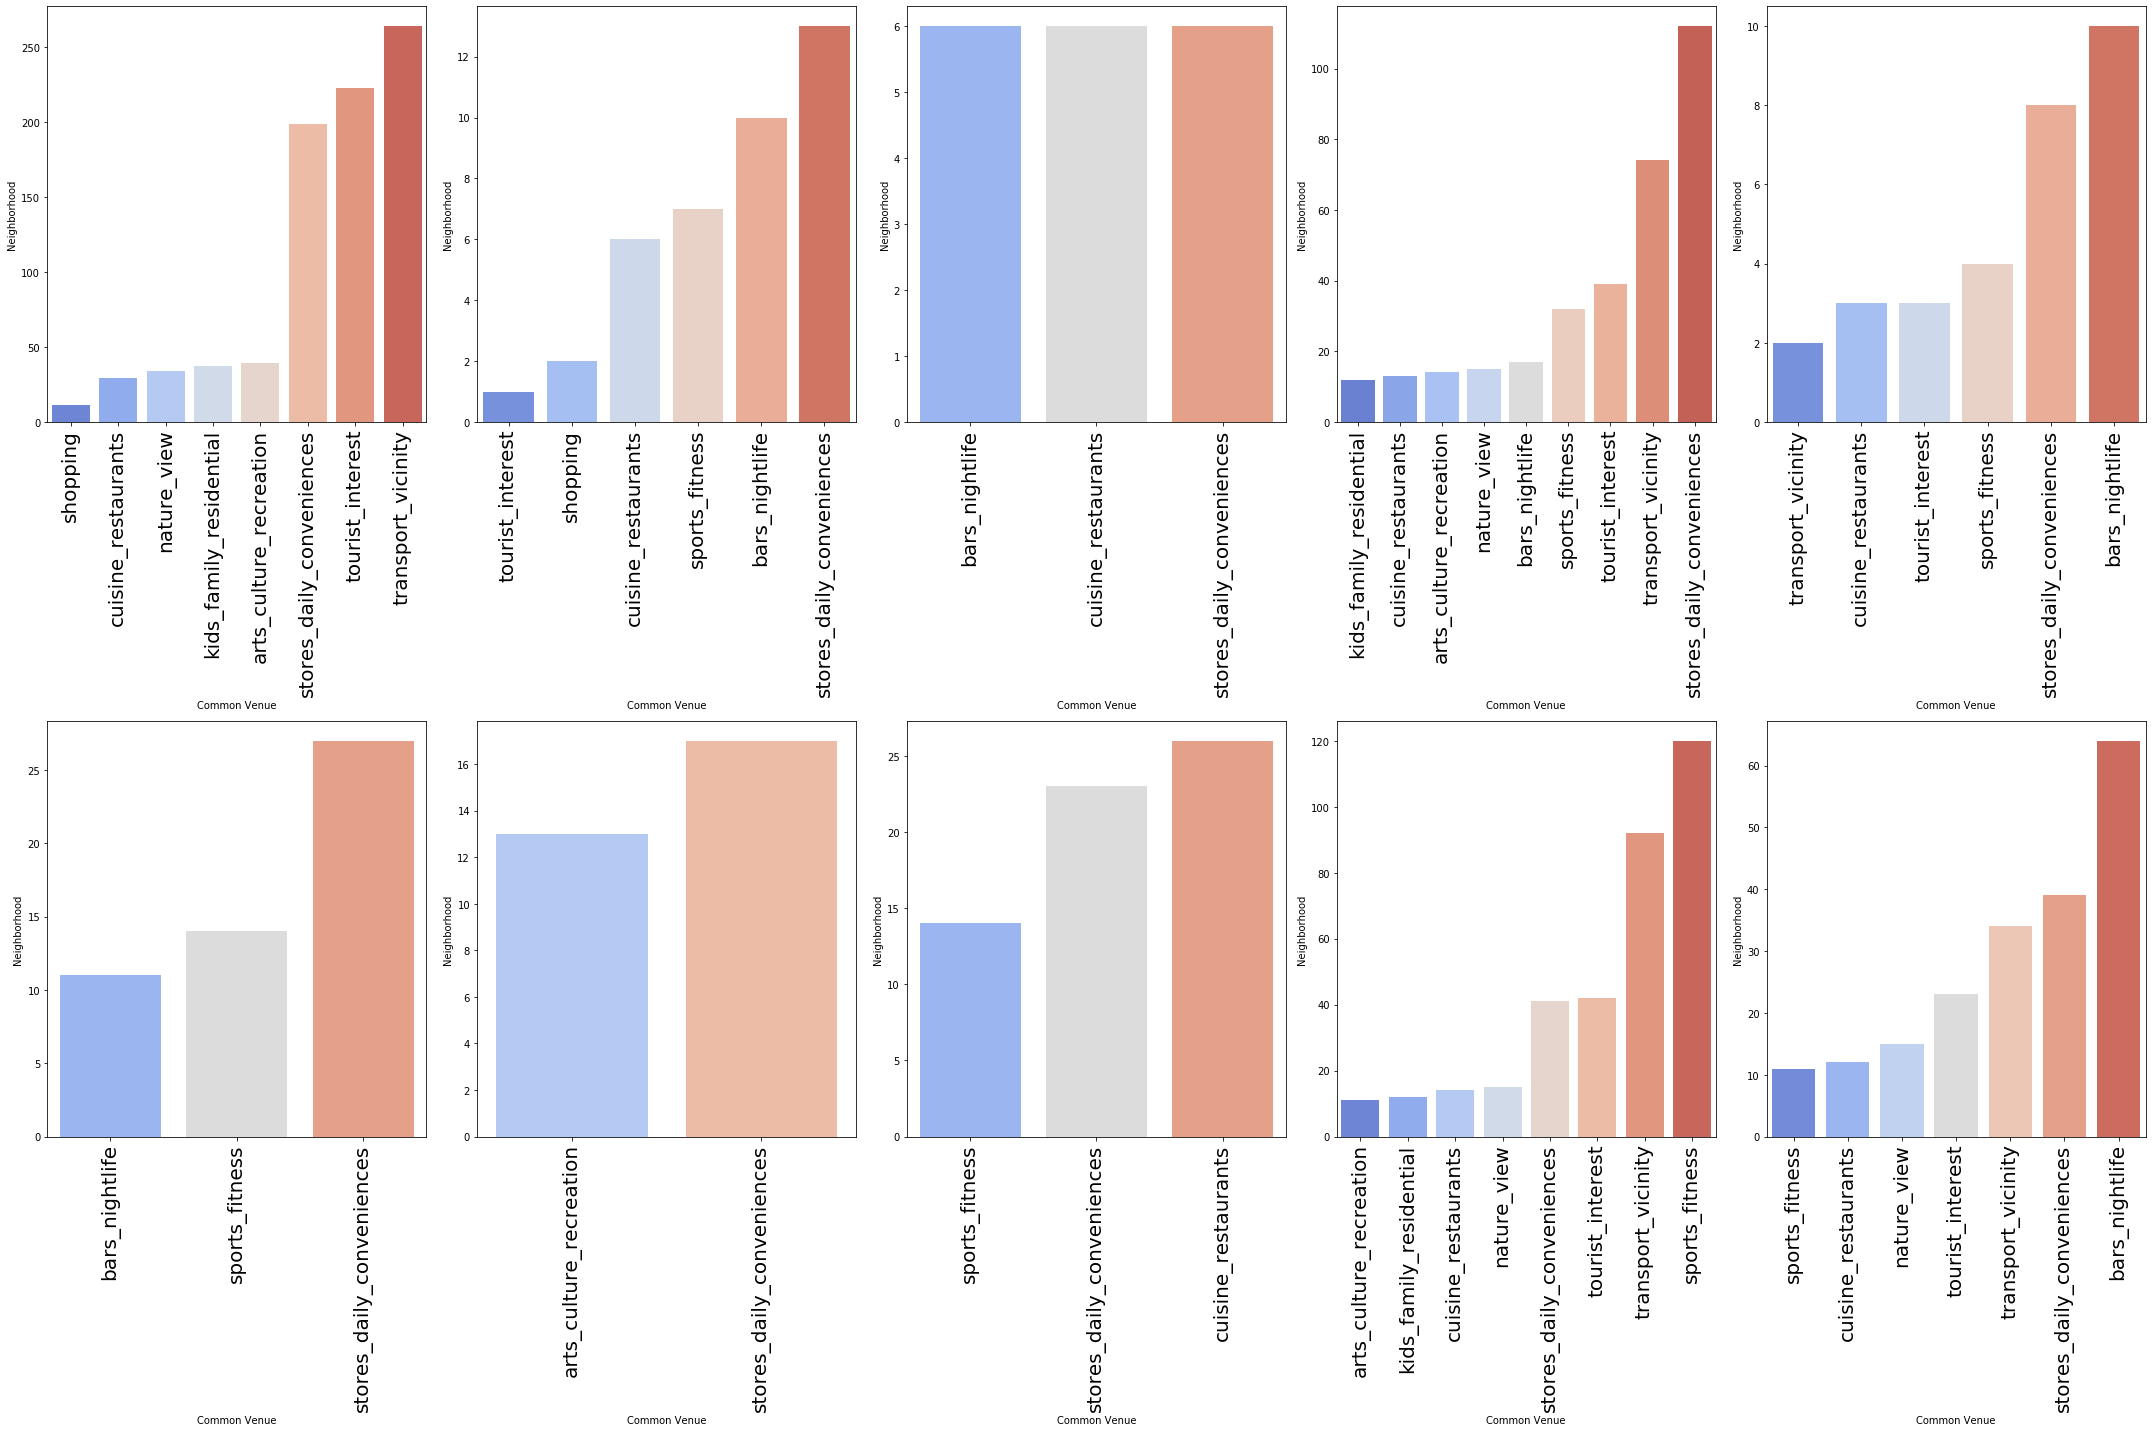

In [195]:
fig, ax = plt.subplots(2,5, figsize = (30,20))
for cluster in range(kclusters):
    sns.barplot(x = top_cluster_venue.loc[cluster_label["Cluster Labels"] == cluster].sort_values("Neighborhood")["Common Venue"],y = top_cluster_venue.loc[cluster_label["Cluster Labels"] == cluster,"Neighborhood"].sort_values(ascending = True), ax = ax.flat[cluster], palette = "coolwarm")
    ax.flat[cluster].set_xticklabels(labels = ax.flat[cluster].get_xticklabels(), rotation = 90, fontsize = 20)
    

plt.tight_layout()
plt.show()

From above graph it is firly clear as what type of surrounding is every cluster.

Cluster_0 =  Residential area Friendly neighborhood <br>
Cluster_1 =  Area for explorers <br>
Cluster_2 =  Commercial Area <br>
Cluster_3 =  Posh Area <br>
Cluster_4 =  Area to hangout <br>
Cluster_5 =  Area for bachelors(young generation)<br>
Cluster_6 =  Area for arts and culture exporers <br>
Cluster_7 =  Area for sports and fitness enthusiats <br>
Cluster_8 =  Area for High Energetic Residents <br>
Cluster_9 =  Area for high profile Residents <br>

# Linear Regression

In [196]:
venue_category_ohe.head()

,SubCity,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,cafe_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,Mira Road And Beyond,4 Bunglows,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Mira Road And Beyond,4 Bunglows,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [197]:
m = venue_category_ohe.merge(avg_price_plot[["sub_city","neighborhood","Avg_price"]], left_on = ["SubCity","Neighborhood"], right_on = ["sub_city","neighborhood"]).drop(["sub_city","neighborhood"], axis = 1)
m.head()

,SubCity,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,cafe_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity,Avg_price
0,Mira Road And Beyond,4 Bunglows,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23588.0
1,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,0,0,0,1,0,0,23588.0
2,Mira Road And Beyond,4 Bunglows,1,0,0,0,0,0,0,0,0,0,0,0,0,0,23588.0
3,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,0,0,0,1,0,0,23588.0
4,Mira Road And Beyond,4 Bunglows,0,0,0,0,0,0,0,0,1,0,0,0,0,0,23588.0


In [198]:
corr_m = m.corr()
corr_m["Avg_price"].sort_values(ascending = False)

Avg_price                    1.000000
bars_nightlife               0.097680
tourist_interest             0.053167
cuisine_restaurants          0.042130
education_colleges           0.027303
cafe_fastfoods               0.020118
arts_culture_recreation      0.012968
business_hub                 0.000265
sports_fitness              -0.019624
kids_family_residential     -0.020055
regular_restaurants         -0.023266
shopping                    -0.024575
stores_daily_conveniences   -0.026986
nature_view                 -0.029210
transport_vicinity          -0.087421
Name: Avg_price, dtype: float64

In [199]:
# venue_category_ohe.head()
neighborhood_categories_grouped.head()

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,4 Bunglows,1,2,0,0,0,1,0,0,2,5,0,0
1,Aarey Milk Colony,0,0,0,0,0,0,0,0,1,0,1,0
2,Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,2,0,0
3,Adarsh Nagar,0,0,0,0,0,0,1,0,0,3,0,0
4,Adharwadi,0,0,0,0,0,0,0,0,1,0,0,0


In [200]:
avg_price_plot.head()

,sub_city,neighborhood,latitude,longitude,Avg_price,price_label,price_binned
0,Mira Road And Beyond,4 Bunglows,19.1247,72.8264,23588.0,4 Bunglows -Rs.23588.0/sq.ft,6
1,Mira Road And Beyond,Aarey Milk Colony,19.1510,72.8831,7650.0,Aarey Milk Colony -Rs.7650.0/sq.ft,2
2,Mumbai South,Abhyudaya Nagar,18.9914,72.8442,26583.5,Abhyudaya Nagar -Rs.26583.5/sq.ft,6
3,Central Mumbai suburbs,Adaigaon,19.0086,73.1282,4675.0,Adaigaon -Rs.4675.0/sq.ft,1
4,Mumbai South,Adarsh Nagar,19.0147,72.8216,36252.0,Adarsh Nagar -Rs.36252.0/sq.ft,9


In [201]:
data_m = neighborhood_categories_grouped.merge(avg_price_plot[["neighborhood","Avg_price"]], left_on = ["Neighborhood"], right_on = ["neighborhood"]).drop(["neighborhood"], axis = 1)
data_m.head()

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity,Avg_price
0,4 Bunglows,1,2,0,0,0,1,0,0,2,5,0,0,23588.0
1,Aarey Milk Colony,0,0,0,0,0,0,0,0,1,0,1,0,7650.0
2,Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,2,0,0,26583.5
3,Adarsh Nagar,0,0,0,0,0,0,1,0,0,3,0,0,36252.0
4,Adharwadi,0,0,0,0,0,0,0,0,1,0,0,0,5291.0


In [202]:
data_m.shape

(685, 14)

In [203]:
corr_matrix = data_m.corr()
corr_matrix

,arts_culture_recreation,bars_nightlife,business_hub,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity,Avg_price
arts_culture_recreation,1.000000,0.380932,0.009855,0.366124,0.148061,0.124520,0.090733,0.255373,0.285901,0.365767,0.231420,-0.008820,0.300529
bars_nightlife,0.380932,1.000000,0.001441,0.656191,0.091621,0.120445,0.017217,0.222389,0.426200,0.473556,0.341672,0.038377,0.313890
business_hub,0.009855,0.001441,1.000000,-0.047682,-0.007653,0.066815,0.061250,-0.034431,-0.070560,-0.005274,0.012665,-0.051308,0.052349
cuisine_restaurants,0.366124,0.656191,-0.047682,1.000000,0.121089,0.090318,0.070852,0.291030,0.436487,0.476514,0.250492,-0.005272,0.321471
education_colleges,0.148061,0.091621,-0.007653,0.121089,1.000000,0.070985,0.067022,-0.019791,0.267279,0.105515,0.195729,0.014521,0.137250
kids_family_residential,0.124520,0.120445,0.066815,0.090318,0.070985,1.000000,0.112728,0.050356,0.153988,0.147122,0.026642,-0.076578,0.172132
nature_view,0.090733,0.017217,0.061250,0.070852,0.067022,0.112728,1.000000,0.008519,0.070673,0.091187,0.045665,-0.002363,0.160845
shopping,0.255373,0.222389,-0.034431,0.291030,-0.019791,0.050356,0.008519,1.000000,0.208585,0.394544,0.130200,-0.048822,0.102357
sports_fitness,0.285901,0.426200,-0.070560,0.436487,0.267279,0.153988,0.070673,0.208585,1.000000,0.411288,0.149685,-0.025739,0.305280
stores_daily_conveniences,0.365767,0.473556,-0.005274,0.476514,0.105515,0.147122,0.091187,0.394544,0.411288,1.000000,0.200820,-0.070579,0.387046


In [204]:
corr_matrix["Avg_price"].sort_values(ascending = False)

Avg_price                    1.000000
stores_daily_conveniences    0.387046
tourist_interest             0.335527
cuisine_restaurants          0.321471
bars_nightlife               0.313890
sports_fitness               0.305280
arts_culture_recreation      0.300529
kids_family_residential      0.172132
nature_view                  0.160845
education_colleges           0.137250
shopping                     0.102357
business_hub                 0.052349
transport_vicinity          -0.018632
Name: Avg_price, dtype: float64

In [205]:
X = data_m.iloc[:,1:-1]
X.head()

,arts_culture_recreation,bars_nightlife,business_hub,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,1,2,0,0,0,1,0,0,2,5,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,1,0,0,3,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [206]:
y = data_m["Avg_price"]
y.head()

0    23588.0
1     7650.0
2    26583.5
3    36252.0
4     5291.0
Name: Avg_price, dtype: float64

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [210]:
lr = LinearRegression()

In [211]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
y_test_pred = lr.predict(X_test)

In [213]:
test_rmse = (mean_squared_error(y_test,y_test_pred))**(1/2)
test_rmse

6919.145584754608

In [214]:
rsq_test = r2_score(y_test,y_test_pred)
rsq_test

0.2277130868475008

In [215]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [216]:
cv_score = - cross_val_score(lr,X,y,cv = 10,n_jobs = -1,verbose = 2,scoring = "neg_mean_squared_error")
cv_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


array([72749742.0897514 , 61866997.80239399, 89995675.15698168,
       77002661.37592492, 64185632.68426596, 29916529.63273995,
       19002206.7387922 , 11297588.30286447, 46599577.27058979,
       73011678.98193514])

In [217]:
cv_score.mean()

54562829.00362394

In [218]:
cv_rmse = (cv_score.mean())**(1/2)
cv_rmse

7386.665621484699

In [219]:
y_pred_train = lr.predict(X_train)
train_rmse = (mean_squared_error(y_train,y_pred_train))**(1/2)
train_rmse

7308.675773569745

In [220]:
rsq = r2_score(y_train,y_pred_train)
rsq

0.2930697348800898

In [221]:
mean_sq_error = mean_squared_error(y_train,y_pred_train)
mean_sq_error

53416741.5631653

In [222]:
# root_msq = np.sqrt(mean_squared_error(y_test,pred))
# root_msq

In [223]:
lr.coef_

array([ 1672.38346223,  -132.17009821,   590.75213572,   731.72379432,
       -4060.67473311,  1643.75298194,  1299.25549034, -2696.44153796,
        1489.28048591,  1136.38540807,  4224.66223338,  -224.84853154])

In [224]:
coef_df = pd.DataFrame({"Venue":X.columns,"Coefficients":lr.coef_}).sort_values(by = "Coefficients", ascending = False).reset_index(drop = True)
coef_df

,Venue,Coefficients
0,tourist_interest,4224.662233
1,arts_culture_recreation,1672.383462
2,kids_family_residential,1643.752982
3,sports_fitness,1489.280486
4,nature_view,1299.255490
5,stores_daily_conveniences,1136.385408
6,cuisine_restaurants,731.723794
7,business_hub,590.752136
8,bars_nightlife,-132.170098
9,transport_vicinity,-224.848532


In [225]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [226]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["mse", "friedman_mse", "mae"]}

In [227]:
# Instantiate a Decision Tree classifier: tree_reg
tree_reg = DecisionTreeRegressor()

In [228]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree_reg, param_dist, cv=5)

In [229]:
# Fit it to the data
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [230]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'mse', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
Best score is 0.16880290932443673


In [231]:
y_tree_pred = tree_cv.predict(X_test)

In [232]:
rsq_test = r2_score(y_test,y_tree_pred)
rsq_test

0.166186075276324

Again, the result doesn't seems very promising as the R2 score is still small. The machine learning models can't be used to predict precisely a neighborhood's average house price. This could support our earlier conclusion of analysis, that venues don't contribute much to the housing prices
There are lot of Venues in Navi Mumbai yet they have cheapest housing prices in the city. This could mean that venues don't have major impact on housing prices.This can be a strong point and help further in our analysis.